# Valve DF31

##### Necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
import functions
from fancyimpute import KNN, IterativeImputer
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import ensemble, utils, linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.metrics import mean_squared_error
import sklearn
sklearn.__version__

C:\Users\Redlab-ILYAS\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
Using TensorFlow backend.


'0.22'

### 1. Dataset

#### 1.1. load dataset 

C:\Users\Redlab-ILYAS\Desktop\Valve_Project_new\Valve_Project\notebook\functions.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  A = df_dataset.as_matrix()


rate of missing values     :  23.03 %
nb elements                :  335
nb variables               :  628


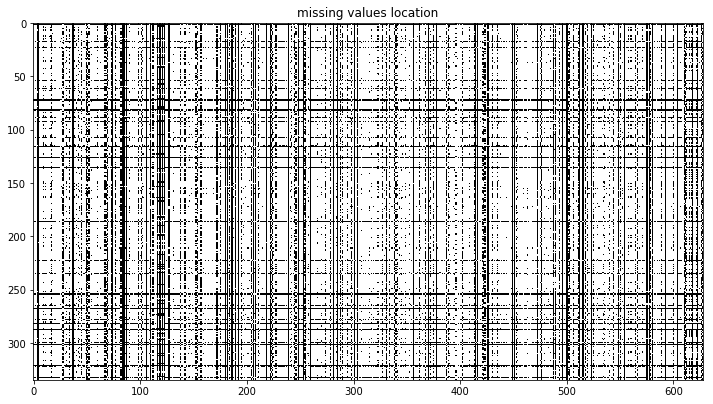

Dataset head : 



X0       X1   X2       X3  X4  X5   X6       X7   X8    X9  ...  X618  \
0  1.600  349.097  0.0  7.42129 NaN NaN  0.0  47.1500  0.0  47.0  ...   NaN   
1  1.950  327.309  0.0  7.46124 NaN NaN  0.0  47.2000  0.0  47.3  ...   NaN   
2    NaN      NaN  NaN      NaN NaN NaN  NaN      NaN  NaN   NaN  ...   NaN   
3  3.105  337.544  0.0  7.39241 NaN NaN  0.0  47.9667  0.0  47.8  ...   NaN   
4  2.130  303.979  0.0  7.39070 NaN NaN  0.0  48.3000  0.0   NaN  ...   NaN   

      X619    X620     X621  X622    X623  X624   X625      X626  X627  
0  3.25789  0.1600      NaN   NaN  32.530   0.6  100.0  0.507692   NaN  
1  3.84762  0.1900  8.45625   NaN  34.250   0.8  100.0       NaN   NaN  
2      NaN     NaN      NaN   NaN     NaN   NaN    NaN       NaN   NaN  
3  3.98111  0.2475      NaN   NaN  34.635   0.8  100.0       NaN  9.69  
4  3.57381  0.2200      NaN   NaN  33.940   0.7  100.0       NaN  6.54  

[5 rows x 628 columns]

In [2]:
max_rate_per_col = 100
df_dataset, df_column_name = functions.get_dataset()
df_dataset, df_missing, missing_image, rate = functions.miss_col(df_dataset, df_column_name, max_rate_per_col)

print ('rate of missing values     : ', rate, '%')
print ('nb elements                : ',df_dataset.shape[0])
print ('nb variables               : ',df_dataset.shape[1])

plt.figure(figsize=(12,12))
plt.title('missing values location')
plt.imshow(missing_image, cmap='gray')
plt.show()

print('Dataset head : \n')
df_dataset.head()

#### 1.2. Create target variable Y
- Creation of the target variable from the combination of the two variables which correspond to the side streaming max test on the valve

In [3]:
col1 = 'X294'
col2 = 'X298'

df_dataset = functions.combine(df_dataset, col1, col2, 'Y')
df_dataset = df_dataset.drop(np.where(df_dataset['Y'].astype(str) == 'nan')[0]).reset_index(drop=True)
df_column_name = df_column_name.drop(index=[294]).reset_index(drop=True)
df_column_name['columns'].loc[297] = 'Y'
df_dataset.head()
df_dataset.to_csv('../data/dataset_brut.csv', sep=';')

#### 1.3. Drop not necessary columns

In [4]:
df_col_del = pd.read_csv('../data/col_del.csv', encoding='utf-8', delimiter='\t')
list_col_del = []
list_col_ind = []
for col in df_col_del['Name;Test'].tolist():
    idx = np.where(df_column_name['names'] == col)[0][0]
    list_col_del.append(df_column_name['columns'].tolist()[idx])
    list_col_ind.append(idx)
    
df_column_name = df_column_name.drop(index=list_col_ind).reset_index(drop=True)
df_dataset = df_dataset.drop(columns=list_col_del)
print('lenght of not necessary tests : ',len(df_col_del['Name;Test'].tolist()))

lenght of not necessary tests :  196


#### 1.4. Combine columns

In [5]:
df_dataset = functions.combine(df_dataset, 'X341', 'X172', 'X341')
df_column_name = df_column_name.drop(index=[np.where(df_column_name['columns'] == 'X172')[0][0]]).reset_index(drop=True)

df_dataset = functions.combine(df_dataset, 'X77', 'X254', 'X77')
df_column_name = df_column_name.drop(index=[np.where(df_column_name['columns'] == 'X254')[0][0]]).reset_index(drop=True)

df_dataset = functions.combine(df_dataset, 'X396', 'X487', 'X396')
df_column_name = df_column_name.drop(index=[np.where(df_column_name['columns'] == 'X487')[0][0]]).reset_index(drop=True)

df_dataset = functions.combine(df_dataset, 'X540', 'X489', 'X540')
df_column_name = df_column_name.drop(index=[np.where(df_column_name['columns'] == 'X489')[0][0]]).reset_index(drop=True)

df_dataset = functions.combine(df_dataset, 'X626', 'X45', 'X626')
df_column_name = df_column_name.drop(index=[np.where(df_column_name['columns'] == 'X45')[0][0]]).reset_index(drop=True)

df_dataset = functions.combine(df_dataset, 'X501', 'X413', 'X501')
df_column_name = df_column_name.drop(index=[np.where(df_column_name['columns'] == 'X413')[0][0]]).reset_index(drop=True)

df_dataset = functions.combine(df_dataset, 'X67', 'X372', 'X67')
df_column_name = df_column_name.drop(index=[np.where(df_column_name['columns'] == 'X372')[0][0]]).reset_index(drop=True)

df_dataset = functions.combine(df_dataset, 'X157', 'X453', 'X157')
df_column_name = df_column_name.drop(index=[np.where(df_column_name['columns'] == 'X453')[0][0]]).reset_index(drop=True)

df_dataset = functions.combine(df_dataset, 'X112', 'X421', 'X112')
df_column_name = df_column_name.drop(index=[np.where(df_column_name['columns'] == 'X421')[0][0]]).reset_index(drop=True)

df_dataset = functions.combine(df_dataset, 'X362', 'X34', 'X362')
df_column_name = df_column_name.drop(index=[np.where(df_column_name['columns'] == 'X34')[0][0]]).reset_index(drop=True)

df_dataset = functions.combine(df_dataset, 'X175', 'X69', 'X175')
df_column_name = df_column_name.drop(index=[np.where(df_column_name['columns'] == 'X69')[0][0]]).reset_index(drop=True)

df_dataset = functions.combine(df_dataset, 'X175', 'X610', 'X175')
df_column_name = df_column_name.drop(index=[np.where(df_column_name['columns'] == 'X610')[0][0]]).reset_index(drop=True)

#### 1.5. Add new column |kpi-kinvpi|

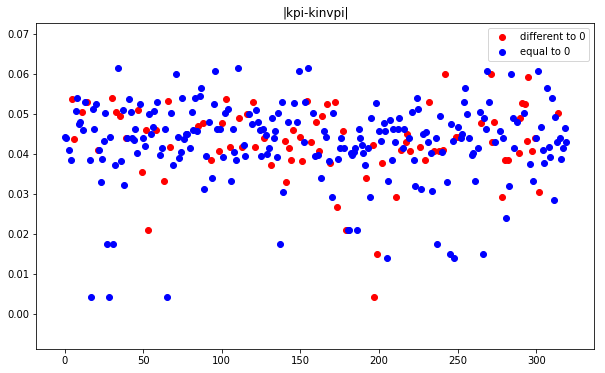

In [6]:
# |Kpi - Kinvpi|
diff = abs(df_dataset['X26'] - df_dataset['X438'])
df_dataset = df_dataset.drop(columns=['X438'])
df_dataset['X26'] = diff
df_column_name = df_column_name.drop(index=[np.where(df_column_name['columns'] == 'X438')[0][0]]).reset_index(drop=True)
plt.figure(figsize=(10,6));
plt.title('|kpi-kinvpi|');
plt.scatter(np.arange(len(df_dataset['X26']))[np.where(df_dataset['Y']!= 0)[0]],df_dataset['X26'][np.where(df_dataset['Y']!= 0)[0]],color='r',label='different to 0');
plt.scatter(np.arange(len(df_dataset['X26']))[np.where(df_dataset['Y']==0)[0]],df_dataset['X26'][np.where(df_dataset['Y']==0)[0]],color='b',label='equal to 0');
plt.legend();

#### 1.6. Missing values

##### 1.6.1. missing values per column:

rate of missing values     :  19.07 %
nb elements                :  320
nb variables               :  418


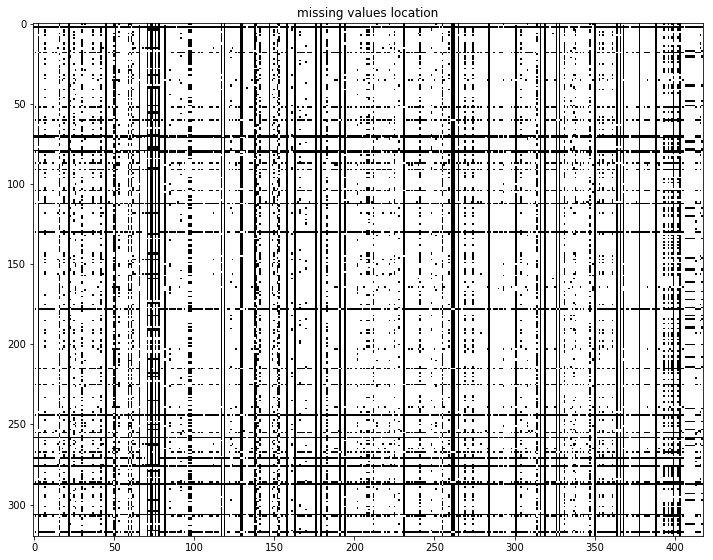

index column                       material_description|analyte  \
0     119   X192  METERING_CHAMBER-DF30-48--PBT-NATU-|VALVE-DF31...   
1     388   X604  METERING_CHAMBER-DF30-48--PBT-NATU-|VALVE-DF31...   
2      22    X37  STRIP-P-NBR-404E-0,55-0,65-S1-|GASKET-P-404E-7...   
3     350   X554  METERING_CHAMBER-DF30-48--PBT-NATU-|VALVE-DF31...   
4     319   X500  METERING_CHAMBER-DF30-48--PBT-NATU-|VALVE-DF31...   
5      45    X74  METERING_CHAMBER-DF30-48--PBT-NATU-|VALVE-DF31...   
6     284   X451  METERING_CHAMBER-DF30-48--PBT-NATU-|VALVE-DF31...   
7      51    X84  RESIN-VALOX HX312C-1H1001-|LOWER_STEM-DF30--RC...   
8     179   X285  RESIN-VALOX HX312C-1H1001-|STEM-DF31--PBT-NATU...   
9     176   X281  RUBBER-PERBUNAN 3945 F|MIX-P-NBR-404E-C6-|STRI...   
10    163   X260  RESIN-VALOX HX312C-1H1001-|HOUSING-DF30-3SS---...   
11    158   X253  STRIP-P-NBR-403E-0,97-1,05-S1-|GASKET-P-403E-7...   
12    147   X239  RUBBER-PERBUNAN 3945 F|MIX-P-NBR-403E-C6_2-|ST...   
13    378   X592  RESIN-VALOX HX312C-1H1001-|METERING_CHAMBER-DF...   
14    316   X496  HOUSING-DF30-3SS-----PBT-NATU-|VALVE-DF31-50--...   
15     74   X119  SPRING-DF30-DF60-RETURN-INOX---|VALVE-DF31-50-...   
16    261   X414  SPRING-DF30-DF60-RETURN-INOX---|VALVE-DF31-50-...   
17    191   X301  SPRING-DF30-DF60-RETURN-INOX---|VALVE-DF31-50-...   
18    326   X512  SPRING-DF30-DF60-RETURN-INOX---|VALVE-DF31-50-...   
19    328   X515  SPRING-DF30-DF60-RETURN-INOX---|VALVE-DF31-50-...   
20    262   X416  SPRING-DF30-DF60-RETURN-INOX---|VALVE-DF31-50-...   

    count missing      rate  
0           320.0  1.000000  
1           320.0  1.000000  
2           320.0  1.000000  
3           320.0  1.000000  
4           320.0  1.000000  
5           320.0  1.000000  
6           320.0  1.000000  
7           320.0  1.000000  
8           320.0  1.000000  
9           320.0  1.000000  
10          320.0  1.000000  
11          320.0  1.000000  
12          320.0  1.000000  
13          320.0  1.000000  
14          319.0  0.996875  
15          314.0  0.981250  
16          314.0  0.981250  
17          314.0  0.981250  
18          314.0  0.981250  
19          314.0  0.981250  
20          314.0  0.981250

In [7]:
max_rate_per_col = 100
df_dataset, df_missing, missing_image, rate = functions.miss_col(df_dataset, df_column_name, max_rate_per_col)

print ('rate of missing values     : ', rate, '%')
print ('nb elements                : ',df_dataset.shape[0])
print ('nb variables               : ',df_dataset.shape[1])

plt.figure(figsize=(12,12))
plt.title('missing values location')
plt.imshow(missing_image, cmap='gray')
plt.show()

df_missing.sort_values('rate',ascending=False).reset_index().loc[:20]

##### 1.6.2. keep variables that have less than 15% missing values:

C:\Users\Redlab-ILYAS\Desktop\Valve_Project_new\Valve_Project\notebook\functions.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  A = df_dataset.as_matrix()


rate of missing values     :  6.76 %
nb elements                :  320
nb variables               :  334


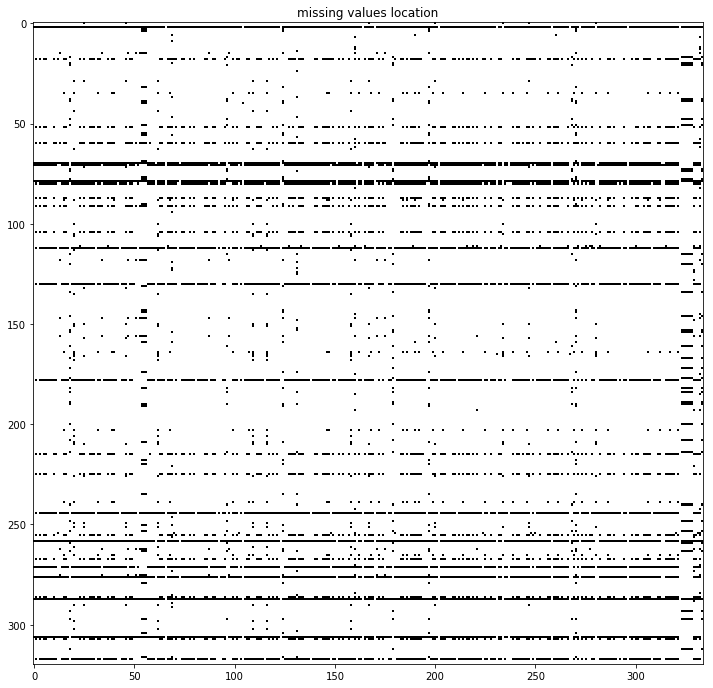

Selected columns : 


index column                       material_description|analyte  \
0     197   X390  STEM-DF31--PBT-NATU-----|STEM-DF31--PBT-NATU--...   
1     270   X534  STEM-DF31--PBT-NATU-----|STEM-DF31--PBT-NATU--...   
2      55   X120  STEM-DF31--PBT-NATU-----|STEM-DF31--PBT-NATU--...   
3      56   X122  STEM-DF31--PBT-NATU-----|STEM-DF31--PBT-NATU--...   
4      69   X146  RUBBER-PERBUNAN 3945 F|MIX-P-NBR-403E-C6_2-|ST...   
5     124   X258  STEM-DF31--PBT-NATU-----|STEM-DF31--PBT-NATU--...   
6     160   X317  RESIN-VALOX HX312C-1H1001-|STEM-DF31--PBT-NATU...   
7      54   X117  STEM-DF31--PBT-NATU-----|STEM-DF31--PBT-NATU--...   
8     332   X362  RESIN-VALOX HX312C-1H1001-|STEM-DF31--PBT-NATU...   
9      62   X131  ADDITIVE-KRONOS 1171--KRONOS-|MIX-P-NBR-404E-C...   
10    109   X225  ADDITIVE-KRONOS 1171--KRONOS-|MIX-P-NBR-404E-C...   
11     20    X43  ADDITIVE-KRONOS 1171--KRONOS-|MIX-P-NBR-404E-C...   
12    158   X315  ADDITIVE-KRONOS 1171--KRONOS-|MIX-P-NBR-404E-C...   
13    116   X241  ADDITIVE-KRONOS 1171--KRONOS-|MIX-P-NBR-404E-C...   
14    131   X270  RUBBER-PERBUNAN 3945 F|MIX-P-NBR-404E-C6-|STRI...   
15    327   X626  FIX-DF60-CS-20--CRIMP-AL-SILV-------|VALVE-DF3...   
16    329    X67  RESIN-VALOX HX312C-1H1001-|HOUSING-DF30-3SS---...   
17    328   X501  FIX-DF60-CS-20--CRIMP-AL-SILV-------|VALVE-DF3...   
18    324    X77  FIX-DF60-CS-20--CRIMP-AL-SILV-------|VALVE-DF3...   
19    323   X341  FIX-DF60-CS-20--CRIMP-AL-SILV-------|VALVE-DF3...   
20    326   X540  FIX-DF60-CS-20--CRIMP-AL-SILV-------|VALVE-DF3...   

    count missing      rate  
0            48.0  0.150000  
1            48.0  0.150000  
2            48.0  0.150000  
3            48.0  0.150000  
4            48.0  0.150000  
5            48.0  0.150000  
6            48.0  0.150000  
7            48.0  0.150000  
8            48.0  0.150000  
9            44.0  0.137500  
10           44.0  0.137500  
11           44.0  0.137500  
12           44.0  0.137500  
13           44.0  0.137500  
14           40.0  0.125000  
15           39.0  0.121875  
16           39.0  0.121875  
17           39.0  0.121875  
18           39.0  0.121875  
19           39.0  0.121875  
20           39.0  0.121875

In [8]:
max_rate_per_col = 15
df_dataset, df_missing, missing_image, rate = functions.miss_col(df_dataset, df_column_name, max_rate_per_col)

print ('rate of missing values     : ', rate, '%')
print ('nb elements                : ',df_dataset.shape[0])
print ('nb variables               : ',df_dataset.shape[1])

plt.figure(figsize=(12,12))
plt.title('missing values location')
plt.imshow(missing_image, cmap='gray')
plt.show()

print('Selected columns : ')
df_missing.sort_values('rate',ascending=False).reset_index().loc[:20]

##### 1.6.3. keep elements that have less than 5% missing values:

C:\Users\Redlab-ILYAS\Desktop\Valve_Project_new\Valve_Project\notebook\functions.py:88: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  A = df_dataset.as_matrix()


|Rate of missing values :  0.77 %
|NB rows                :  272
|NB cols                :  334


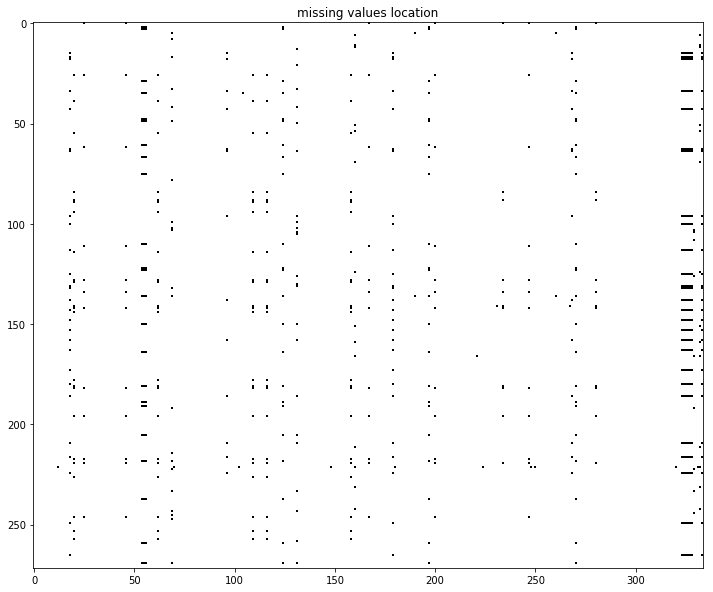

index column                       material_description|analyte  \
0     333   X175  FIX-DF60-CS-20--CRIMP-AL-SILV-------|VALVE-DF3...   
1     325   X396  FIX-DF60-CS-20--CRIMP-AL-SILV-------|VALVE-DF3...   
2      18    X40  FIX-DF60-CS-20--CRIMP-AL-SILV-------|VALVE-DF3...   
3     323   X341  FIX-DF60-CS-20--CRIMP-AL-SILV-------|VALVE-DF3...   
4     324    X77  FIX-DF60-CS-20--CRIMP-AL-SILV-------|VALVE-DF3...   
5     179   X352  FIX-DF60-CS-20--CRIMP-AL-SILV-------|VALVE-DF3...   
6     326   X540  FIX-DF60-CS-20--CRIMP-AL-SILV-------|VALVE-DF3...   
7     327   X626  FIX-DF60-CS-20--CRIMP-AL-SILV-------|VALVE-DF3...   
8     328   X501  FIX-DF60-CS-20--CRIMP-AL-SILV-------|VALVE-DF3...   
9      55   X120  STEM-DF31--PBT-NATU-----|STEM-DF31--PBT-NATU--...   
10     56   X122  STEM-DF31--PBT-NATU-----|STEM-DF31--PBT-NATU--...   
11     62   X131  ADDITIVE-KRONOS 1171--KRONOS-|MIX-P-NBR-404E-C...   
12    109   X225  ADDITIVE-KRONOS 1171--KRONOS-|MIX-P-NBR-404E-C...   
13    116   X241  ADDITIVE-KRONOS 1171--KRONOS-|MIX-P-NBR-404E-C...   
14     20    X43  ADDITIVE-KRONOS 1171--KRONOS-|MIX-P-NBR-404E-C...   
15    124   X258  STEM-DF31--PBT-NATU-----|STEM-DF31--PBT-NATU--...   
16    131   X270  RUBBER-PERBUNAN 3945 F|MIX-P-NBR-404E-C6-|STRI...   
17    158   X315  ADDITIVE-KRONOS 1171--KRONOS-|MIX-P-NBR-404E-C...   
18    197   X390  STEM-DF31--PBT-NATU-----|STEM-DF31--PBT-NATU--...   
19    270   X534  STEM-DF31--PBT-NATU-----|STEM-DF31--PBT-NATU--...   
20     54   X117  STEM-DF31--PBT-NATU-----|STEM-DF31--PBT-NATU--...   

    count missing      rate  
0            27.0  0.099265  
1            27.0  0.099265  
2            27.0  0.099265  
3            27.0  0.099265  
4            27.0  0.099265  
5            27.0  0.099265  
6            27.0  0.099265  
7            27.0  0.099265  
8            27.0  0.099265  
9            23.0  0.084559  
10           23.0  0.084559  
11           23.0  0.084559  
12           23.0  0.084559  
13           23.0  0.084559  
14           23.0  0.084559  
15           23.0  0.084559  
16           23.0  0.084559  
17           23.0  0.084559  
18           23.0  0.084559  
19           23.0  0.084559  
20           23.0  0.084559

In [9]:
max_rate_per_row = 5
df_dataset, df_missing, missing_image, rate = functions.miss_row(df_dataset, df_column_name, max_rate_per_row)

print ('|Rate of missing values : ', rate, '%')
print ('|NB rows                : ',df_dataset.shape[0])
print ('|NB cols                : ',df_dataset.shape[1])

plt.figure(figsize=(12,12))
plt.title('missing values location')
plt.imshow(missing_image, cmap='gray')
plt.show()

df_missing.sort_values('rate',ascending=False).reset_index().loc[:20]

#### 1.7. Drop columns with no variability

nb varibales with low variance :  95
rate of missing values     :  0.86 %
nb elements                :  272
nb variables               :  239


C:\Users\Redlab-ILYAS\Desktop\Valve_Project_new\Valve_Project\notebook\functions.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  A = df_dataset.as_matrix()


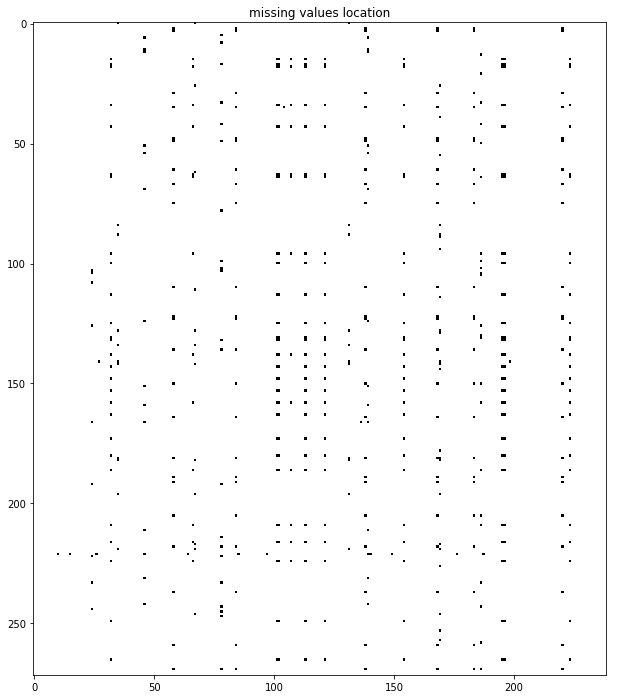


variables with no variance : 



cols                                              names
0   X2  ADDITIVE-KRONOS 1171--KRONOS-|MIX-P-NBR-403E-C...
1   X6  ADDITIVE-ULTRASIL VN3 GR--EVONIK-|MIX-P-NBR-40...
2   X8  ADDITIVE-KRONOS 1171--KRONOS-|MIX-P-NBR-403E-C...
3  X10  ADDITIVE-KRONOS 1171--KRONOS-|MIX-P-NBR-403E-C...
4  X13  ADDITIVE-KRONOS 1171--KRONOS-|MIX-P-NBR-404E-C...
5  X14  ADDITIVE-ULTRASIL VN3 GR--EVONIK-|MIX-P-NBR-40...
6  X19  ADDITIVE-KRONOS 1171--KRONOS-|MIX-P-NBR-404E-C...
7  X29  ADDITIVE-SATINTONE W/WHITETEX--BASF-|MIX-P-NBR...
8  X46  ADDITIVE-ULTRASIL VN3 GR--EVONIK-|MIX-P-NBR-40...
9  X54  ADDITIVE-KRONOS 1171--KRONOS-|MIX-P-NBR-403E-C...

In [10]:
l=[]
for col in df_dataset.columns:
    std = df_dataset[col].std()
    if std == 0:
        l.append(col)

names = []
for col in l:
    names.append(df_column_name['names'].tolist()[df_column_name['columns'].tolist().index(col)])
    
df = pd.DataFrame()
df['cols'] = l
df['names'] = names

print ('nb varibales with low variance : ',(len(l)))

liste = df_dataset.columns.tolist()
liste = set(liste) - set(l)
old_dataset = df_dataset
df_dataset = df_dataset[liste]

max_rate_per_col = 100
df_dataset, df_missing, missing_image, rate = functions.miss_col(df_dataset, df_column_name, max_rate_per_col)

print ('rate of missing values     : ', rate, '%')
print ('nb elements                : ',df_dataset.shape[0])
print ('nb variables               : ',df_dataset.shape[1])

plt.figure(figsize=(12,12))
plt.title('missing values location')
plt.imshow(missing_image, cmap='gray')
plt.show()

print ('\nvariables with no variance : \n')
df[:10]

#### 1.8. Target visualization

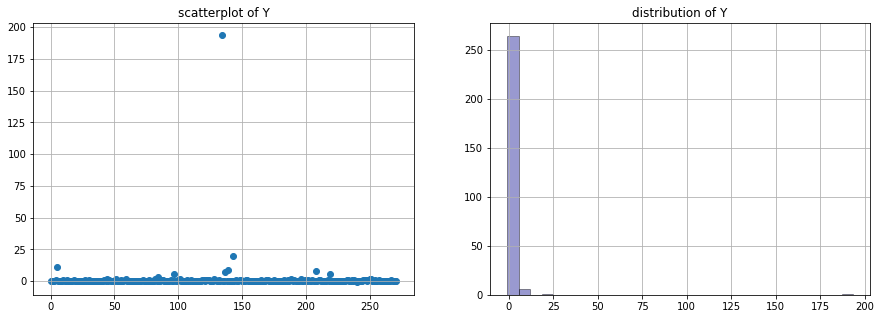

-Nb data different to 0 :  76
-Nb data equal to 0     :  196


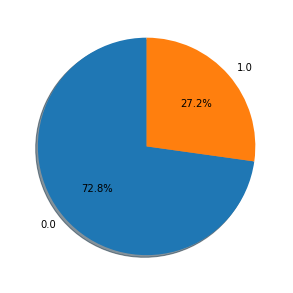

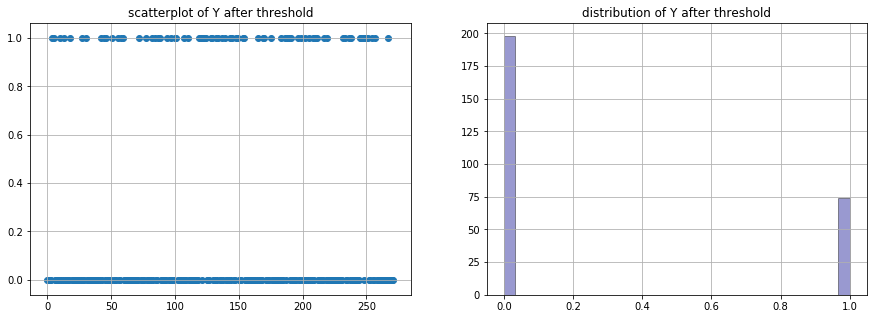

In [11]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title('scatterplot of Y')
plt.scatter(np.arange(len(df_dataset)), df_dataset['Y'])
plt.grid()
plt.subplot(122)
plt.title('distribution of Y')
sns.distplot(df_dataset['Y'].tolist(),color='darkblue',kde=False,bins=30,hist_kws={'edgecolor':'black'})
plt.grid()
plt.show()

print ('-Nb data different to 0 : ',len(df_dataset['Y'][np.where(df_dataset['Y'] != 0)[0]]))
print ('-Nb data equal to 0     : ',len(df_dataset['Y'][np.where(df_dataset['Y'] == 0)[0]]))


df_dataset['Y'][np.where(df_dataset['Y'] == -1)[0][0]] = 0
df_dataset['Y'][np.where(df_dataset['Y'] == 0.5)[0][0]] = 0
df_dataset['Y'][np.where(df_dataset['Y'] != 0)[0]] = 1

unique, count = np.unique(df_dataset['Y'].tolist(), return_counts=True)
plt.figure(figsize=(15,5))
plt.pie(count, labels=unique,  autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title('scatterplot of Y after threshold')
plt.scatter(np.arange(len(df_dataset)), df_dataset['Y'])
plt.grid()
plt.subplot(122)
plt.title('distribution of Y after threshold')
sns.distplot(df_dataset['Y'].tolist(),color='darkblue',kde=False,bins=30,hist_kws={'edgecolor':'black'})
plt.grid()
plt.show()

#### 1.9. homoscedasticity test
- for each value of one variable, the other variable has equal variability

C:\Users\Redlab-ILYAS\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3405: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
C:\Users\Redlab-ILYAS\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Redlab-ILYAS\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Redlab-ILYAS\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\Redlab-ILYAS\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2345: RuntimeWarning: invalid value encountered in double_scalars
  W = numer / denom


      col    pvalue
147    X3  0.000315
203  X406  0.004583
47   X461  0.015238
108  X188  0.017136
200   X62  0.020863
rate of missing values     :  0.0 %
nb elements                :  272
nb variables               :  181


C:\Users\Redlab-ILYAS\Desktop\Valve_Project_new\Valve_Project\notebook\functions.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  A = df_dataset.as_matrix()


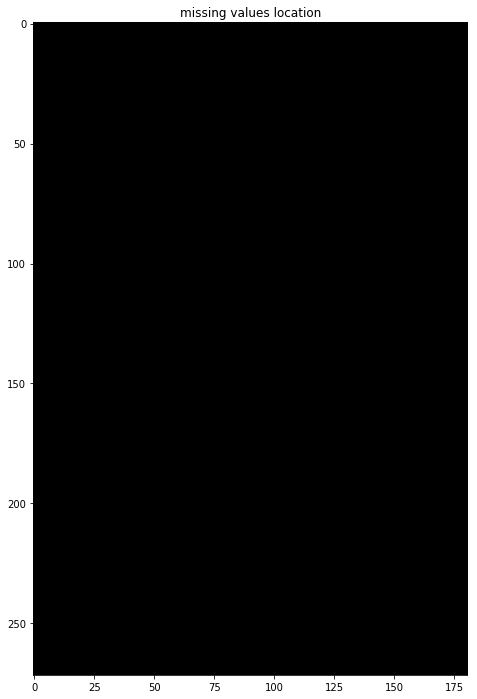

X236   X468     X505  X486     X557      X150    X355     X574  \
0  0.455000  50.40  7.41475   0.2  0.39100  0.048088  0.9940  52.8500   
1  0.485000  48.70  7.37075   0.0  0.35250  0.046529  0.9970  52.8000   
2  0.471667  48.80  7.48400   0.0  0.49000  0.042794  0.9975  52.0333   
3  0.597500  48.15  7.45075   0.0  0.58000  0.049559  0.9970  51.7000   
4  0.597500  47.90  7.44675   0.0  0.89875  0.038963  0.9970  51.7000   

      X312      X595  ...   X302     X458   X573      X581  X247  X275  X134  \
0  2.23000  0.060000  ...  28.50  3.60500  97.90  0.024948  29.1   0.1  0.35   
1  2.05500  0.070000  ...  32.90  3.59000  97.30  0.027118  30.4   0.0  0.50   
2  2.04333  0.060000  ...  35.50  3.54833  97.50  0.027324  35.5   0.0  0.45   
3  1.70500  0.083333  ...  30.65  3.38500  97.60  0.026735  29.9   0.0  0.60   
4  1.70500  0.082500  ...  29.25  3.38500  97.35  0.022757  29.9   0.0  0.60   

     X478  X410    Y  
0  4.5432   0.2  0.0  
1  4.5898   0.2  0.0  
2  4.5518   0.1  0.0  
3  4.5714   0.1  0.0  
4  4.6170   0.1  1.0  

[5 rows x 181 columns]

In [12]:
p_values = []
names=[]
for col in df_dataset.columns:
    sp = stats.levene(df_dataset[col].loc[np.where(df_dataset['Y'] ==0)[0]].tolist(),df_dataset[col].loc[np.where(df_dataset['Y'] ==1)[0]].tolist())[1];
    p_values.append(sp)
    names.append(col)
df = pd.DataFrame()
df['col'] = names
df['pvalue'] = p_values
print(df.sort_values('pvalue').head())
df = df.loc[np.where(df['pvalue'] >= 0.05)[0]]

selected_cols = df['col'].tolist()
selected_cols.append('Y')
df_dataset = df_dataset[selected_cols]

max_rate_per_col = 100
df_dataset, df_missing, missing_image, rate = functions.miss_col(df_dataset, df_column_name, max_rate_per_col)

print ('rate of missing values     : ', rate, '%')
print ('nb elements                : ',df_dataset.shape[0])
print ('nb variables               : ',df_dataset.shape[1])

plt.figure(figsize=(12,12))
plt.title('missing values location')
plt.imshow(missing_image, cmap='gray')
plt.show()

df_dataset.head()

#### 1.10. Impute missing values

In [13]:
# new_df = df_dataset.drop(columns='Y')
# new_df = pd.DataFrame(KNN(7).fit_transform(new_df),columns=new_df.columns)
# new_df['Y'] = np.copy(df_dataset['Y'])
# df_dataset = new_df
# df_dataset.head()

#### 1.11. Correlation (Chi square test) 

In [14]:
from sklearn.feature_selection import SelectKBest, chi2

# Two features with highest chi-squared statistics are selected 
chi2_features = SelectKBest(chi2, k = 5) 
X_kbest_features = chi2_features.fit(df_dataset.drop(columns=['Y']), df_dataset['Y']) 

cols = X_kbest_features.get_support(indices=True)
selected_cols_final = df_dataset.columns[cols].tolist()
print('selected cols : \n',selected_cols_final)

scores = X_kbest_features.scores_
print('\nscores : \n',scores[cols])

selected cols : 
 ['X382', 'X143', 'X149', 'X386', 'X275']

scores : 
 [0.5236022  9.01082943 0.68571594 1.05272768 0.55407299]


#### 1.12. Point biserial Correlation

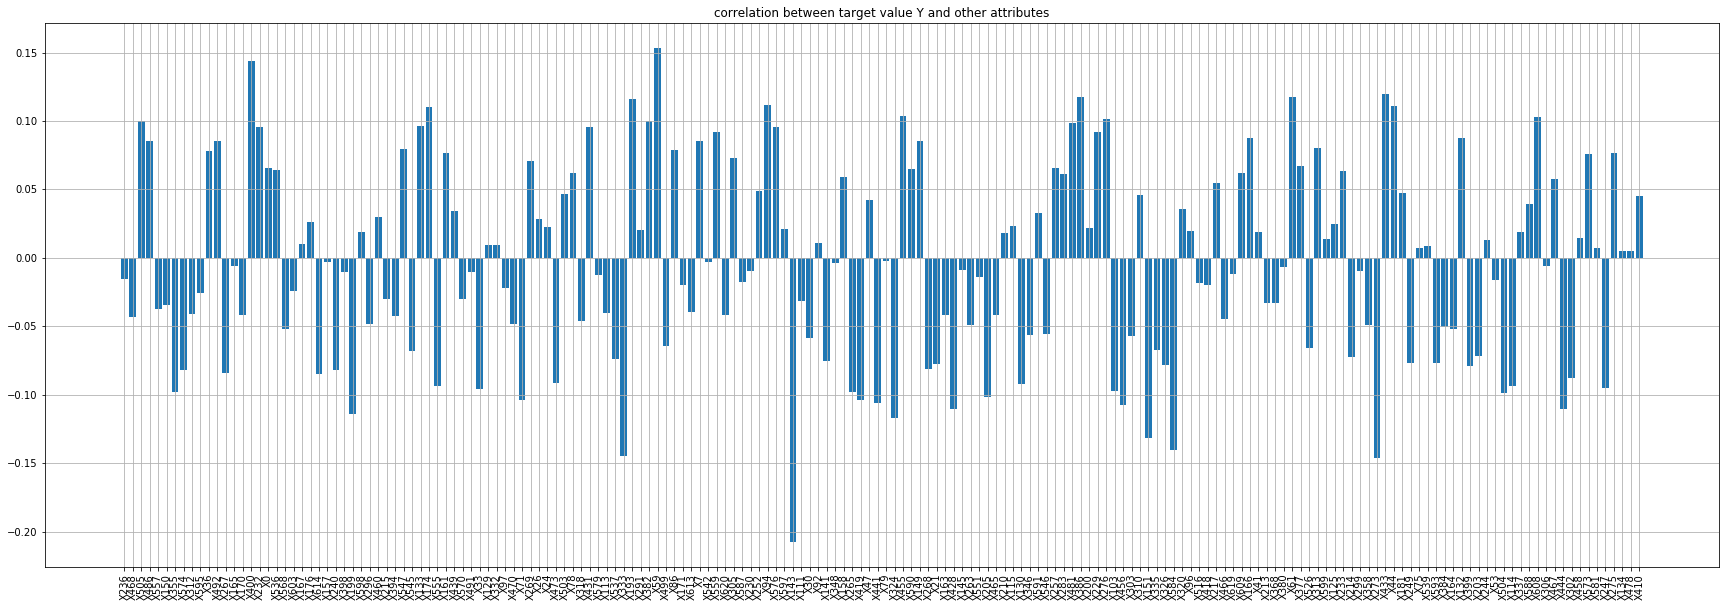

In [15]:
from scipy import stats

list_corr = []
for col in df_dataset.drop(columns=['Y']).columns:
    list_corr.append(stats.pointbiserialr(df_dataset[col].tolist(), df_dataset['Y'].tolist())[0])

plt.figure(figsize=(30,10))
plt.title('correlation between target value Y and other attributes')
plt.bar(df_dataset.drop(columns=['Y']).columns,list_corr)
plt.grid()
plt.xticks(rotation=90);
plt.show()

#### 1.13. Correlation (Pearson)

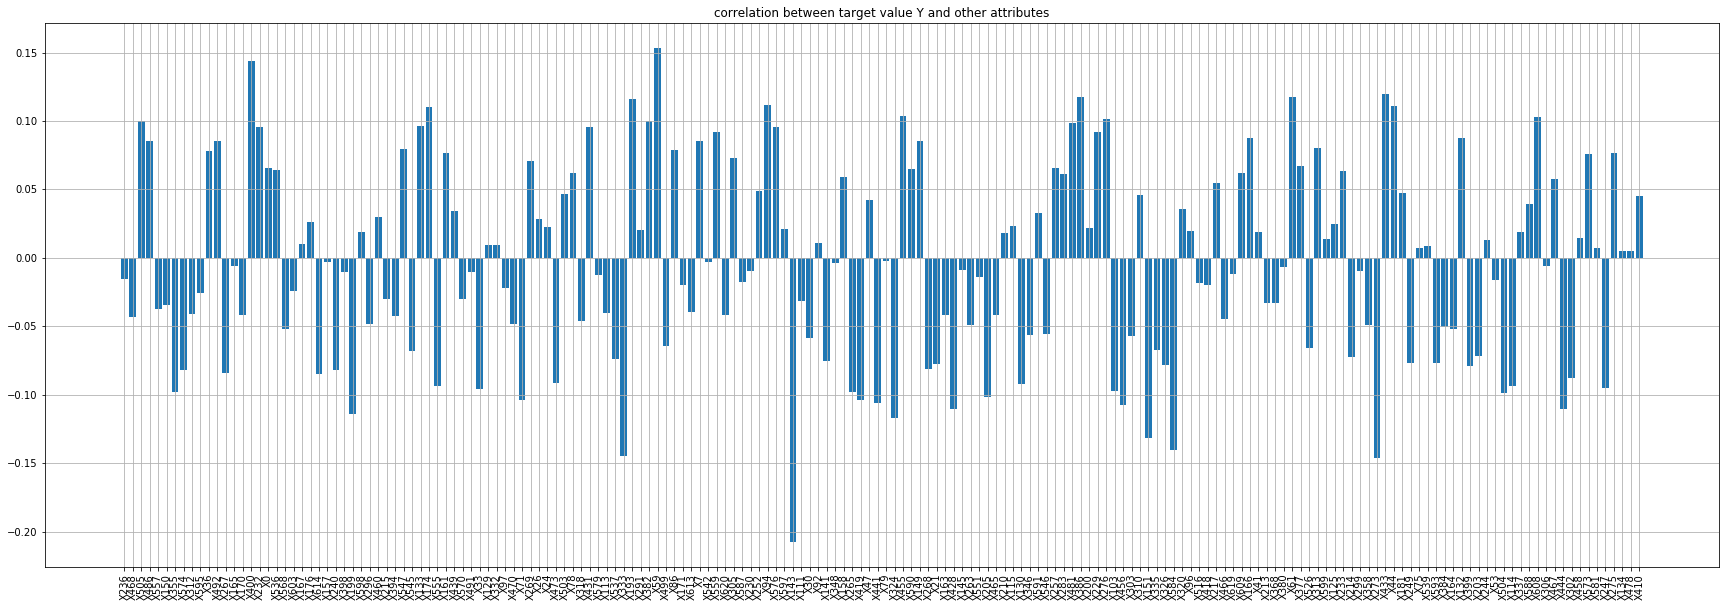

----------------------------------------------------------------------------------
- positive correlations : 
     attribute  correlation                                        description
63        X59     0.153356  ADDITIVE-KRONOS 1171--KRONOS-|MIX-P-NBR-403E-C...
15       X400     0.143892  ADDITIVE-KRONOS 1171--KRONOS-|MIX-P-NBR-403E-C...
149      X433     0.119786  STRIP-P-NBR-404E-0,55-0,65-S1-|GASKET-P-404E-7...
138       X61     0.117726  ADDITIVE-KRONOS 1171--KRONOS-|MIX-P-NBR-403E-C...
113      X386     0.117439  GASKET-P-403E-7,40-1,00-W1-S1-RND-|VALVE-DF31-...
60       X193     0.115913  GASKET-P-404E-7,25-0,60-W1-S1-RND-|VALVE-DF31-...
76        X94     0.111433  GASKET-P-404E-7,25-0,60-W1-S1-RND-|VALVE-DF31-...
150       X44     0.110592  STRIP-P-NBR-404E-0,55-0,65-S1-|GASKET-P-404E-7...
36       X174     0.110147  RESIN-VALOX HX312C-1H1001-|STEM-DF31--PBT-NATU...
92       X455     0.103833  GASKET-P-403E-7,40-1,00-W1-S1-RND-|VALVE-DF31-...
-------------------------------

In [16]:
corr, df_corr = functions.correlation(df_dataset,'Y') 
plt.figure(figsize=(30,10))
plt.title('correlation between target value Y and other attributes')
l = corr.columns.tolist()
l.remove('Y')

a = corr['Y'].tolist()
a.remove(float(1.0))

plt.bar(l,a)
plt.grid()
plt.xticks(rotation=90);
plt.show()

pos_corr = df_corr.sort_values(by='correlation',ascending=False)[1:11]
neg_corr = df_corr.sort_values(by='correlation',ascending=True)[:10]

names=[]
for i in pos_corr.index:
    desc = df_column_name['names'][df_column_name['columns'] == pos_corr['attribute'][i]].tolist()[0]
    names.append(desc)    
pos_corr['description'] = names

names=[]
for i in neg_corr.index:
    desc = df_column_name['names'][df_column_name['columns'] == neg_corr['attribute'][i]].tolist()[0]
    names.append(desc)    
neg_corr['description'] = names

print('----------------------------------------------------------------------------------')
print('- positive correlations : \n',pos_corr)
print('----------------------------------------------------------------------------------')
print('- negative correlations : \n',neg_corr)


#### 1.14. Embedded Method for features selection
Les méthodes intégrées sont itératives elles prennent en charge chaque itération du processus d’entrainement du modèle et extrait soigneusement les variables qui contribuent le plus à l’entrainement pour une itération particulière. Les méthodes de régularisation sont les méthodes embarquées les plus couramment utilisées qui pénalisent une entité étant donné un seuil de coefficient.
Ici, nous ferons la sélection des variables en utilisant la régularisation Lasso. Si l'entité n'est pas pertinente, le lasso pénalise son coefficient et le met à 0. Par conséquent, les entités avec un coefficient égale à 0 sont supprimées et les autres sont prises.

C:\Users\Redlab-ILYAS\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04337022883142083, tolerance: 0.004341013824884793
  tol, rng, random, positive)
C:\Users\Redlab-ILYAS\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0054075716499042414, tolerance: 0.00434862385321101
  tol, rng, random, positive)


Best alpha using built-in LassoCV: 0.225519
Best score using built-in LassoCV: 0.055555
Lasso picked 2 variables and eliminated the other 178 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

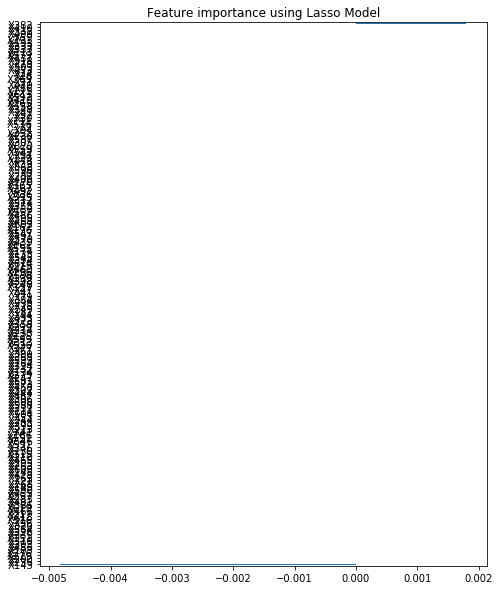

In [17]:
df_results = df_dataset
X = df_results.drop(columns='Y')
y = df_results['Y']
# scaler = MinMaxScaler(feature_range=(1,5))
# X = scaler.fit_transform(X)

reg = linear_model.LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = df_results.drop(columns='Y').columns)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

#### 1.15. Gini Importance
L'importance des caractéristiques est calculée comme la diminution de l'impureté du nœud pondérée par la probabilité d'atteindre ce nœud. La probabilité du nœud peut être calculée par le nombre d'échantillons qui atteignent le nœud, divisé par le nombre total d'échantillons. 
Plus la valeur est élevée, plus la fonction est importante.

Feature ranking:


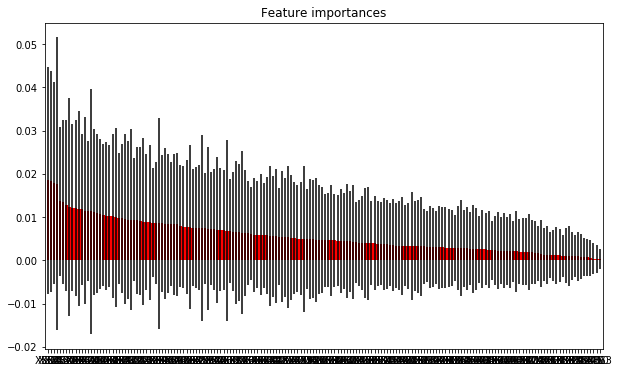

selected variables : 
    column                                               name  importance
0    X584  STEM-DF31--PBT-NATU----P1D-|VALVE-DF31-50---PR...    0.018469
1    X333  STEM-DF31--PBT-NATU----P1D-|VALVE-DF31-50---PR...    0.018284
2    X537                VALVE-DF31-50---PRE1 A--;Ecart type    0.017906
3    X143  STRIP-P-NBR-403E-1,40-1,60-S1-|GASKET-P-403E-1...    0.017763
4    X257    VALVE-DF31-50---PRE1 A--;Saillie Point Mort Bas    0.013667
5    X141         VALVE-DF31-50---PRE1 A--;Moy Concentration    0.013534
6    X324  STEM-DF31--PBT-NATU----P1D-|VALVE-DF31-50---PR...    0.012743
7    X273  STRIP-P-NBR-403E-1,40-1,60-S1-|GASKET-P-403E-1...    0.012344
8      X0  GASKET-P-403E-7,40-1,00-W1-S1-RND-|VALVE-DF31-...    0.012154
9     X94  GASKET-P-404E-7,25-0,60-W1-S1-RND-|VALVE-DF31-...    0.012049
10   X386  GASKET-P-403E-7,40-1,00-W1-S1-RND-|VALVE-DF31-...    0.011925
11   X382  SPRING-DF30-DF60-RETURN-INOX---|VALVE-DF31-50-...    0.011782
12   X230  STRIP-P-NBR-403E-

In [18]:
from sklearn.feature_selection import SelectKBest, RFE
from sklearn.feature_selection import chi2
from imblearn.over_sampling import SMOTE
from sklearn import ensemble, utils, linear_model, tree, svm
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, scale, normalize

# set dataset:
X = df_dataset.drop(columns='Y')
y = df_dataset['Y']

# balouncing classes:
sm = SMOTE(random_state=30, k_neighbors=3)
Xs, y = sm.fit_resample(X, y)

# scale data:
scaler = MinMaxScaler(feature_range=(0,1))
X = scaler.fit_transform(Xs)

# random forest model:
forest = ensemble.RandomForestClassifier(n_estimators=1000, random_state=0)

# fit model:
forest.fit(X,y)

# get features importance:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking:
print("Feature ranking:")
name_col = []
selected_cols = []
value = []
for f in range(X.shape[1]):
    selected_cols.append(Xs.columns[indices[f]])
    value.append(importances[indices[f]])
    name_col.append(df_column_name['names'][df_column_name['columns'] == Xs.columns[indices[f]]].tolist()[0])

# Plot the feature importances of the forest:
plt.figure(figsize=(10,6))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), selected_cols)
plt.xlim([-1, X.shape[1]])
plt.show()

# Dataframe name columns:
df = pd.DataFrame()
df['column'] = selected_cols
df['name'] = name_col
df['importance'] = value

nb_select_var = 30
selected_cols_final=[]
for col in selected_cols[:nb_select_var]:
    selected_cols_final.append(col)

# save selected variables:
df.loc[:nb_select_var].to_csv('../data/selectedVariables.csv', encoding='utf-8',sep=';')
print('selected variables : \n',df[:nb_select_var])

#### 1.16. combine methods for features selection:

In [19]:
selected_cols_final = ['X143','X382','X53','X240','X94','X141','X537']
df_results = Xs[selected_cols_final]
df_results['Y'] = y

C:\Users\Redlab-ILYAS\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


#### 1.17. Intercorrelation of selected variables

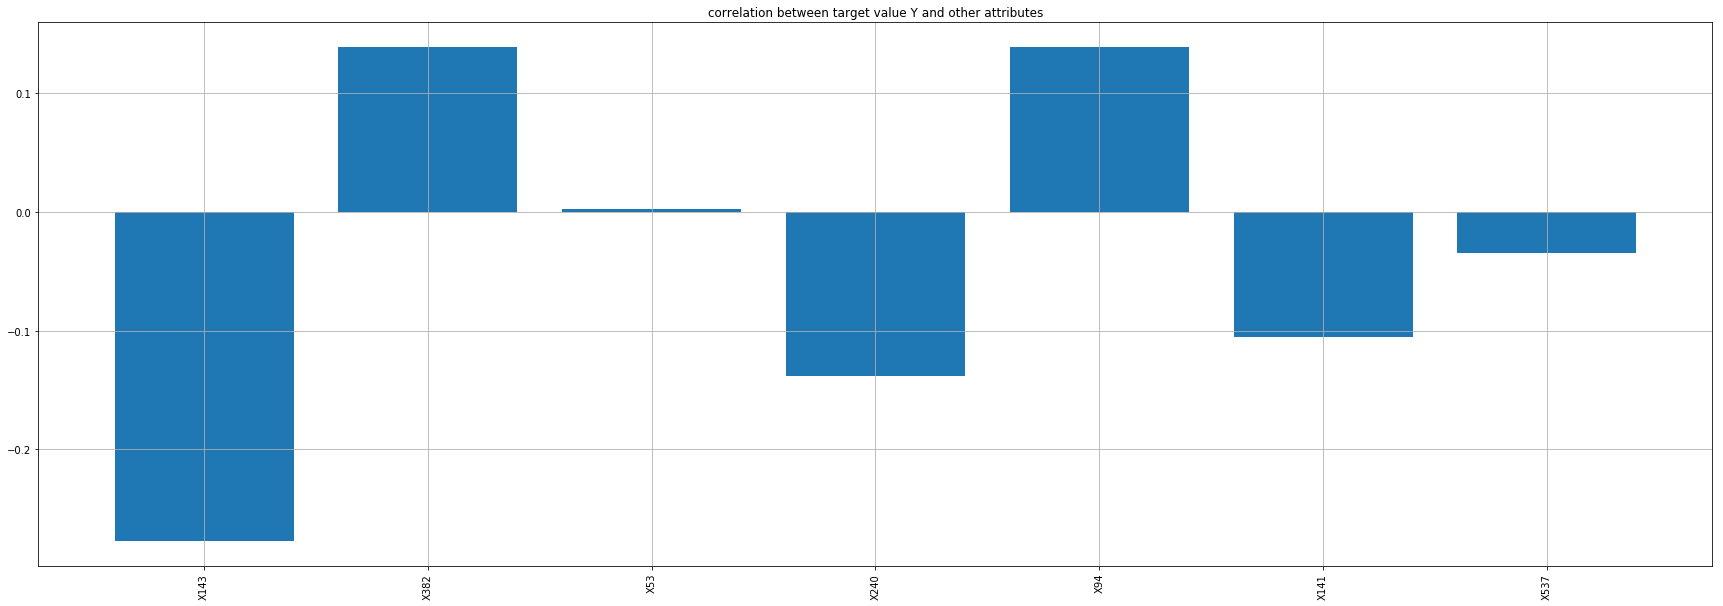

In [20]:
corr = df_results.corr(method='spearman');
corr_mat = corr.style.background_gradient(cmap='coolwarm').set_precision(2)
plt.figure(figsize=(30,10))
plt.title('correlation between target value Y and other attributes')
l = corr.columns.tolist()
l.remove('Y')

a = corr['Y'].tolist()
a.remove(float(1.0))

plt.bar(l,a)
plt.grid()
plt.xticks(rotation=90);
plt.show()
corr_mat

### 2. Predictive model

#### 2.1. plot density of each class for each variable selected

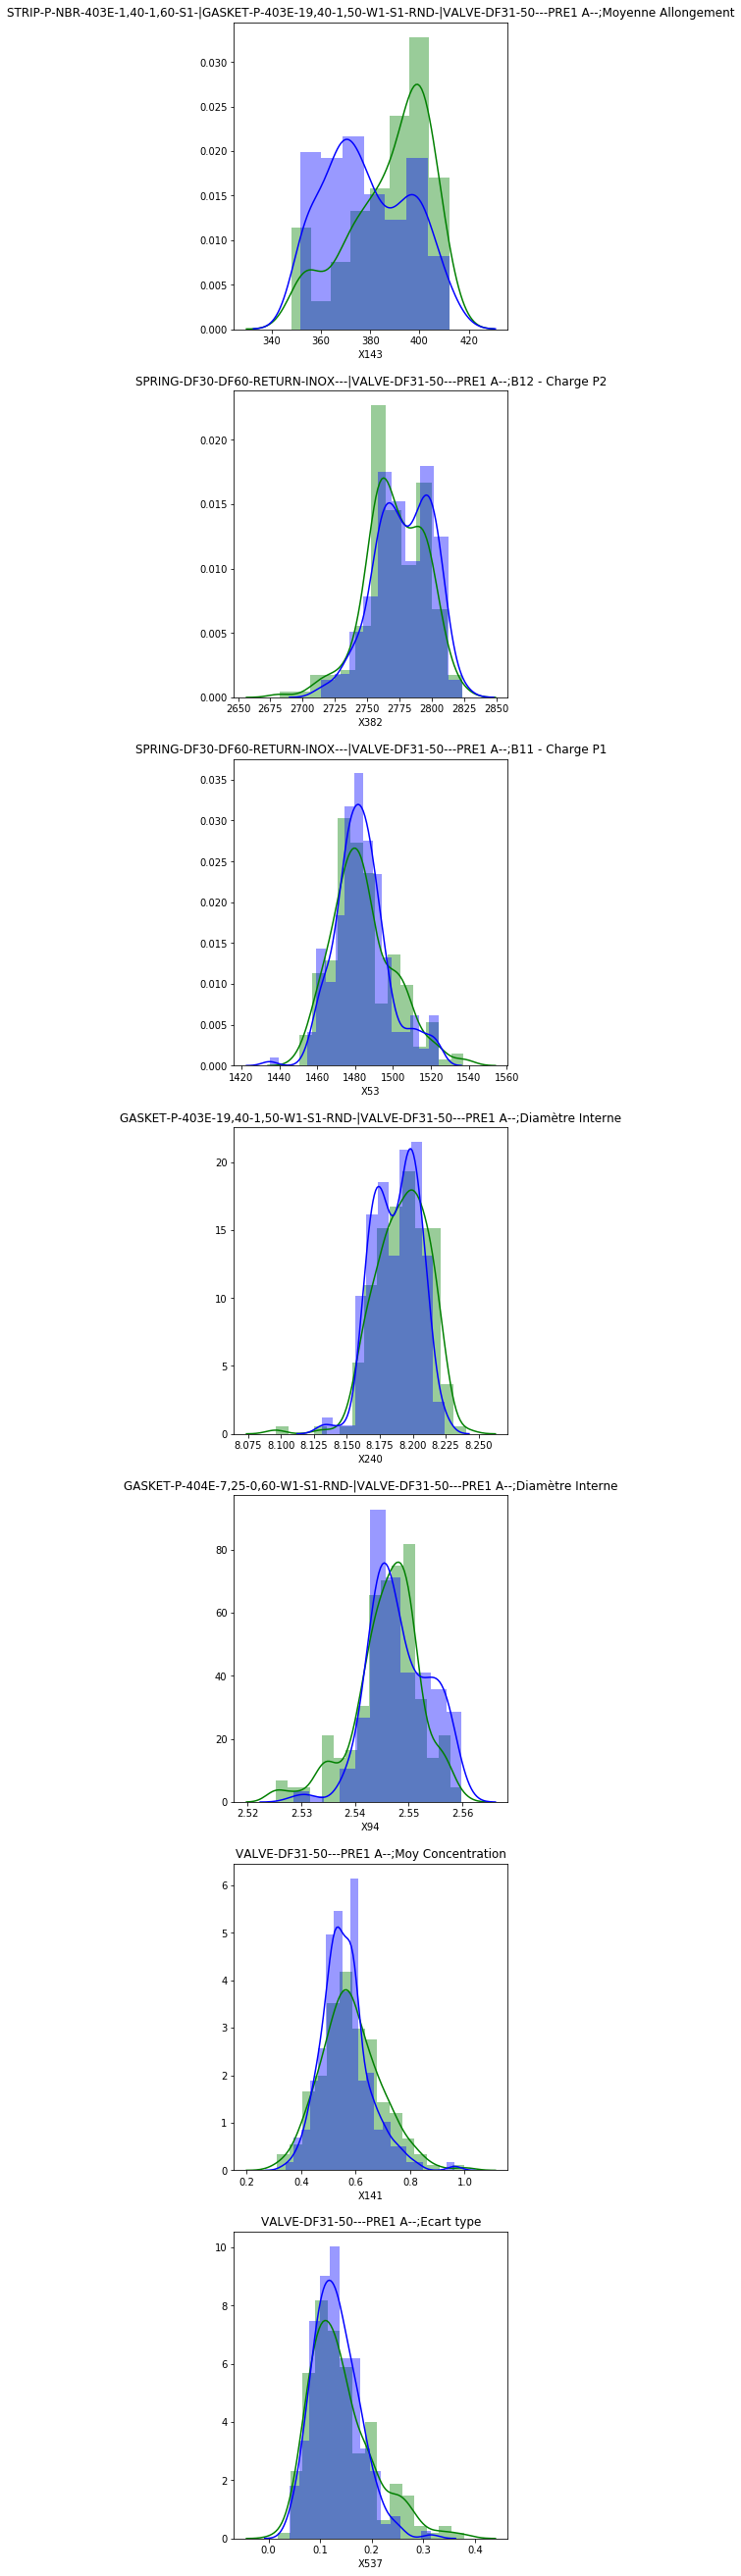

In [21]:
fig = plt.figure(figsize = (5, 15))
j = 0

name_col = []
for i in range(len(selected_cols_final)):
    name_col.append(df_column_name['names'][df_column_name['columns'] == selected_cols_final[i]].tolist()[0])
    
for i, title in zip(df_results.drop(columns=['Y']).columns,name_col):
    plt.subplot(7, 1, j+1)
    j += 1
    sns.distplot(df_results.drop(columns=['Y'])[i][df_results['Y']==0], color='g', label = 'side streaming 0')
    sns.distplot(df_results.drop(columns=['Y'])[i][df_results['Y']==1], color='b', label = 'side streaming 1')
    plt.title(title)
fig.subplots_adjust(top=2.5)
plt.show()

#### 2.2. Plot data by reducing the size of features by PCA

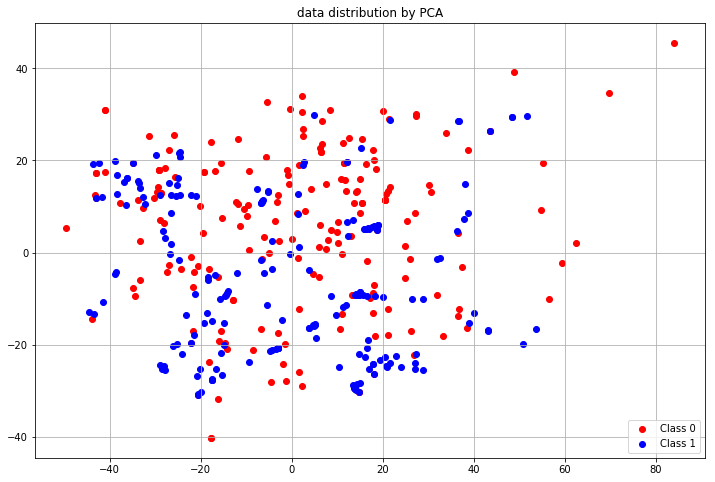

In [22]:
from sklearn.decomposition import PCA, KernelPCA

pca = PCA(2)
X = pca.fit_transform(df_results.drop(columns=['Y']))
plt.figure(figsize=(12,8))
plt.title('data distribution by PCA')

seuil = len(df_results['Y'].tolist())//2
plt.scatter(X[y==0,0],X[y==0,1], color='r', label='Class 0')
plt.scatter(X[y==1,0],X[y==1,1], color='b', label='Class 1')
plt.grid()
plt.legend(loc="lower right")
plt.show()

#### 2.3. Plot 3D by PCA

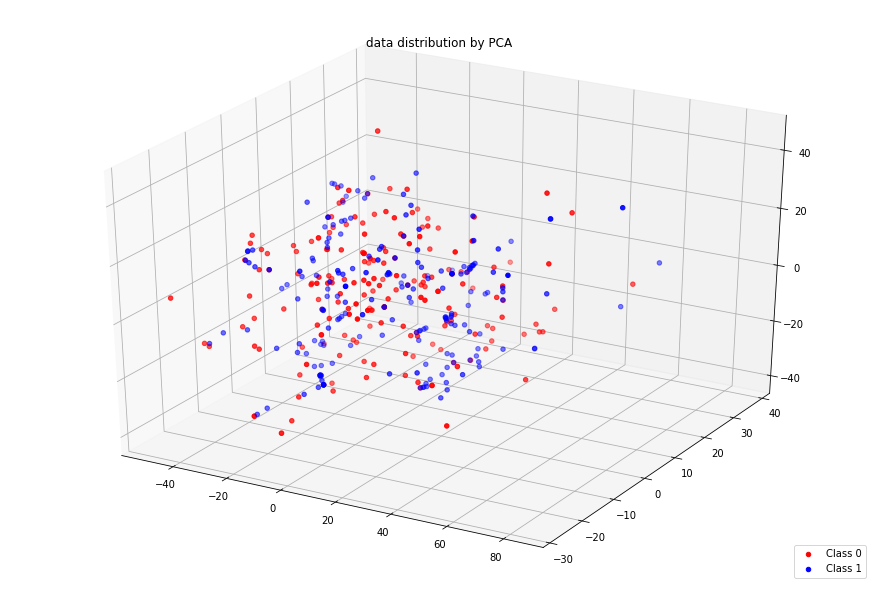

In [23]:
from mpl_toolkits.mplot3d import axes3d, Axes3D #<-- Note the capitalization! 
fig = plt.figure(figsize=(12,8))
ax = Axes3D(fig) #<-- Note the difference from your original code...
plt.title('data distribution by PCA')

pca = PCA(3)
pca_transform = pca.fit_transform(df_results.drop(columns=['Y']))

ax.scatter(pca_transform[:seuil,0],pca_transform[:seuil,2], pca_transform[:seuil,1], color='r', label='Class 0')
ax.scatter(pca_transform[seuil:,0],pca_transform[seuil:,2], pca_transform[seuil:,1], color='b', label='Class 1')
plt.legend(loc="lower right")
plt.show()

#### 2.4. Make a classification model and validate with cross validation

gamma :  0.1  | score :  0.801
gamma :  0.11  | score :  0.801
gamma :  0.12  | score :  0.801
gamma :  0.13  | score :  0.801
gamma :  0.13999999999999999  | score :  0.803
gamma :  0.14999999999999997  | score :  0.803
gamma :  0.15999999999999998  | score :  0.806
gamma :  0.16999999999999998  | score :  0.806
gamma :  0.17999999999999997  | score :  0.811
gamma :  0.18999999999999995  | score :  0.811
gamma :  0.19999999999999996  | score :  0.816
gamma :  0.20999999999999996  | score :  0.816
gamma :  0.21999999999999995  | score :  0.821
gamma :  0.22999999999999995  | score :  0.821
gamma :  0.23999999999999994  | score :  0.823
gamma :  0.24999999999999992  | score :  0.823
gamma :  0.2599999999999999  | score :  0.826
gamma :  0.2699999999999999  | score :  0.826
gamma :  0.2799999999999999  | score :  0.828
gamma :  0.2899999999999999  | score :  0.828
gamma :  0.29999999999999993  | score :  0.833
gamma :  0.30999999999999994  | score :  0.833
gamma :  0.3199999999999999  | 

gamma :  1.8999999999999992  | score :  0.897
gamma :  1.9099999999999993  | score :  0.897
gamma :  1.9199999999999993  | score :  0.897
gamma :  1.9299999999999993  | score :  0.897
gamma :  1.939999999999999  | score :  0.897
gamma :  1.949999999999999  | score :  0.897
gamma :  1.959999999999999  | score :  0.899
gamma :  1.969999999999999  | score :  0.899
gamma :  1.979999999999999  | score :  0.902
gamma :  1.989999999999999  | score :  0.899
gamma :  1.9999999999999991  | score :  0.902
gamma :  2.009999999999999  | score :  0.902
gamma :  2.019999999999999  | score :  0.902
gamma :  2.029999999999999  | score :  0.904
gamma :  2.039999999999999  | score :  0.904
gamma :  2.049999999999999  | score :  0.907
gamma :  2.059999999999999  | score :  0.907
gamma :  2.069999999999999  | score :  0.907
gamma :  2.079999999999999  | score :  0.907
gamma :  2.089999999999999  | score :  0.907
gamma :  2.099999999999999  | score :  0.907
gamma :  2.109999999999999  | score :  0.907
gamma

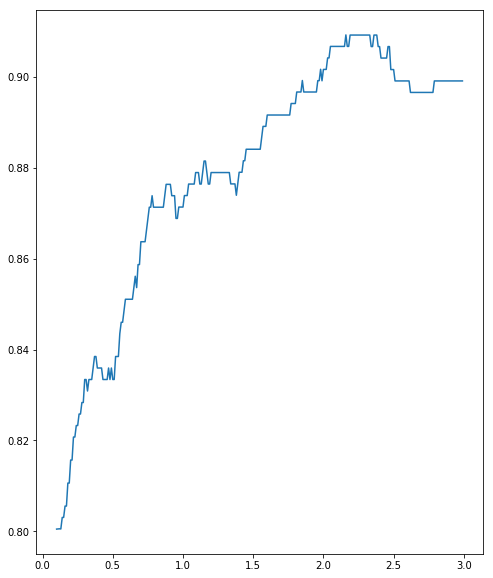

In [24]:
from sklearn import ensemble, utils, linear_model, tree, svm
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, scale, normalize
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA, KernelPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.utils import shuffle
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

# split data into attributes X and target y:
X = df_results.drop(columns=['Y'])
y = np.asarray(list(map(int,df_results['Y'].tolist())))

# save dataset:
datasetReady = pd.DataFrame(columns=df_results.columns)
datasetReady['Y'] = y
datasetReady[X.columns] = X
datasetReady.to_csv('../data/datasetReady.csv',encoding='utf-8',sep=';')

# shuffle data:
#X,y = shuffle(X,y)

# scale data:
scaler = StandardScaler()
X = scaler.fit_transform(X)

score_list = []
range_gamma = np.arange(.1,3,.01)
for gamma in range_gamma:

    # clf = ClassifierChain(linear_model.LogisticRegression())
    clf = svm.SVC(probability=True, gamma = gamma, kernel='rbf', C=10000)
    # clf = ensemble.BaggingClassifier(tree.DecisionTreeClassifier(max_depth=100), n_estimators=gamma, random_state=10)
    # clf = ensemble.GradientBoostingRegressor(max_depth=2,learning_rate=0.01, random_state=1,n_estimators=100,loss='ls')
    # clf = ensemble.GradientBoostingClassifier(max_depth=100,learning_rate=0.01, random_state=1,n_estimators=1500)
    # clf = linear_model.LogisticRegression()
    # clf = linear_model.LinearRegression()
    # clf = tree.DecisionTreeRegressor(gamma)
    # clf = tree.DecisionTreeClassifier(max_depth=100)
    # clf = GaussianNB(var_smoothing=0.00000001)
    # clf = ExtraTreesClassifier(n_estimators=70, random_state=10)
    # clf = MultinomialNB(alpha=0.001)
    # clf = ensemble.RandomForestClassifier(max_depth=20, random_state=1,n_estimators=1000)
    # clf = ensemble.AdaBoostClassifier(svm.SVC(probability=True, gamma=gamma, kernel='rbf',C=10000))
    # clf = ensemble.BaggingClassifier(GaussianNB(var_smoothing=0.001), n_estimators=5, max_samples=200, max_features=300,random_state=10)

    scores = cross_val_score(clf, X, y, cv=5)
    print ('gamma : ',gamma,' | score : ',np.round(np.mean(scores),3))
    score_list.append(np.mean(scores))

gamma = range_gamma[score_list.index(max(score_list))]
plt.plot(range_gamma, score_list)
print ('max score : ',max(score_list))
print ('gamma     : ',gamma)

#### 2.5. Test the model on the test dataset 

cross val scores :  [0.85       0.89873418 0.94936709 0.93670886 0.91139241]
mean scores     :  0.909

---------------------------------------------------------------------------------
- Confusion_matrix : 



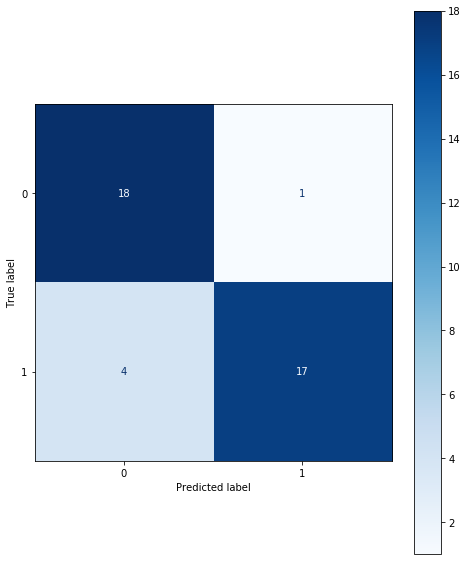

---------------------------------------------------------------------------------
- Classification_report : 
               precision    recall  f1-score   support

           0       0.82      0.95      0.88        19
           1       0.94      0.81      0.87        21

    accuracy                           0.88        40
   macro avg       0.88      0.88      0.87        40
weighted avg       0.88      0.88      0.87        40

---------------------------------------------------------------------------------
- ROC curve : 



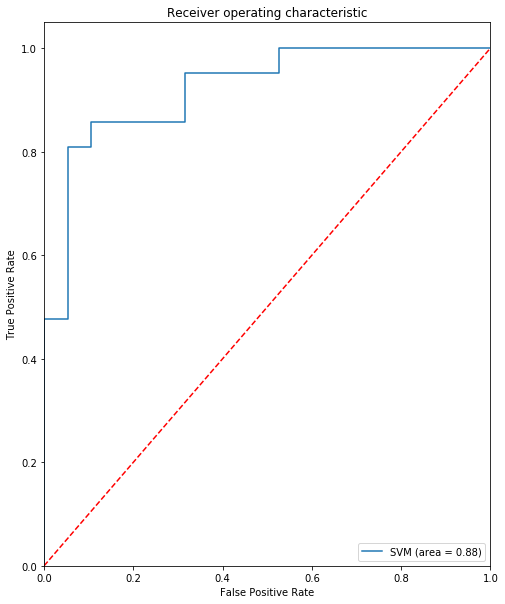

---------------------------------------------------------------------------------
- Prediction vs actual :
    pred  actual
0     0       0
1     0       1
2     1       1
3     1       1
4     0       0


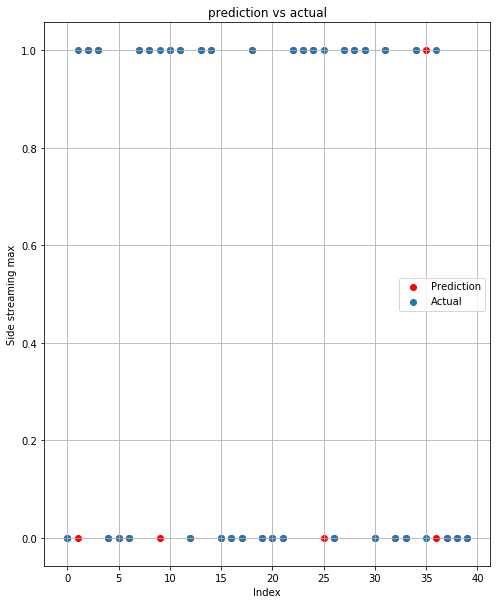

In [25]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
from sklearn.metrics import plot_confusion_matrix

X = df_results.drop(columns=['Y'])
y = list(map(int,df_results['Y'].tolist()))

scaler = StandardScaler()
Xscaler = scaler.fit_transform(X)

# df, df_column_name_test  = functions.get_dataset('../data/DATASET_FINAL_NEW.txt')
# df['X294'].loc[10] = 0
# df = df.drop(index=np.where(df['X294'].astype(str) == 'nan')[0]).reset_index(drop=True)

# # Test
# df['X294'] = df['X294'].astype(int).tolist()
# df['X294'][df['X294'].tolist().index(3)] = 1

# ya = df['X294'].tolist()
# selected_cols_final = df_results.drop(columns=['Y']).columns
# df = df[selected_cols_final]

# frames = [X, df]
# result = pd.concat(frames).reset_index(drop=True)

# scaler = StandardScaler()
# Xscaler = scaler.fit_transform(result)

# x_train = Xscaler[:X.shape[0]]
# y_train = y[:X.shape[0]]
# x_test = Xscaler[X.shape[0]:]
# y_test = ya

# score_list = []
# range_gamma = np.arange(.1,5,.1)
# for gamma in range_gamma:
#     clf = svm.SVC(probability=True, gamma=gamma, kernel='rbf', C=100)
#     scores = cross_val_score(clf, x_train, y_train, cv=5)
#     #print ('gamma : ',gamma,' | score : ',np.mean(scores))
#     score_list.append(np.mean(scores))
    
# gamma = range_gamma[score_list.index(max(score_list))]
# print ('max score : ',max(score_list))
# print ('gamma     : ',gamma)


# set the model: 
clf = svm.SVC(probability=True, gamma=gamma, kernel='rbf',C=10000)

# cross validation:
scores = cross_val_score(clf, Xscaler, y, cv=5)
print('cross val scores : ',scores)
print ('mean scores     : ',np.round(np.mean(scores),3))

# split data into train and test datasets:
x_train, x_test, y_train, y_test = train_test_split(Xscaler, y, test_size=0.1)

# train the model:
clf.fit(x_train,y_train)

# predict values:
pred = clf.predict(x_test)

# model performances:
confusion_matrix = confusion_matrix(y_test, pred)
print('\n---------------------------------------------------------------------------------')
print('- Confusion_matrix : \n')
plot_confusion_matrix(clf, x_test, y_test,display_labels=['0', '1'],cmap=plt.cm.Blues)
plt.show()
print('---------------------------------------------------------------------------------')
print('- Classification_report : \n',classification_report(y_test, pred))
print('---------------------------------------------------------------------------------')
print('- ROC curve : \n')
logit_roc_auc = roc_auc_score(y_test, pred)
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='SVM (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
prediction = pd.DataFrame()
prediction['pred'] = pred
prediction['actual'] = y_test
print('---------------------------------------------------------------------------------')
print('- Prediction vs actual :\n',prediction.head())
# plot results
plt.figure()
plt.title('prediction vs actual')
plt.ylabel('Side streaming max')
plt.xlabel('Index')
plt.scatter(np.arange(len(pred)),pred,label='Prediction',color='r')
plt.scatter(np.arange(len(pred)),y_test,label='Actual')
plt.legend()
plt.grid()

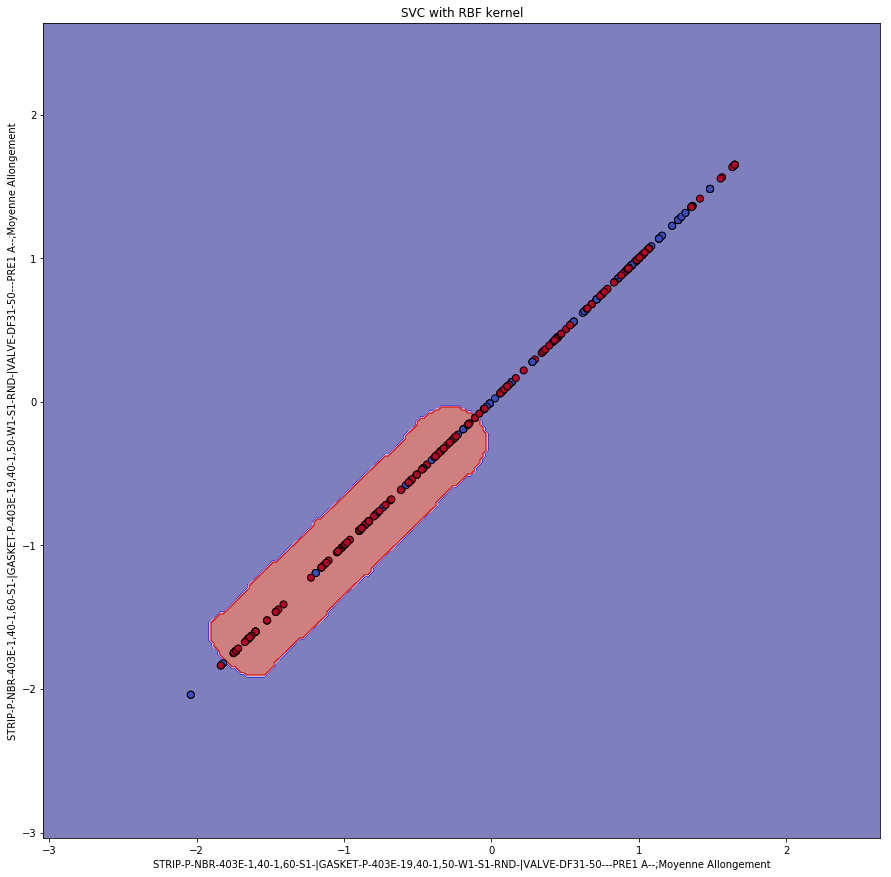

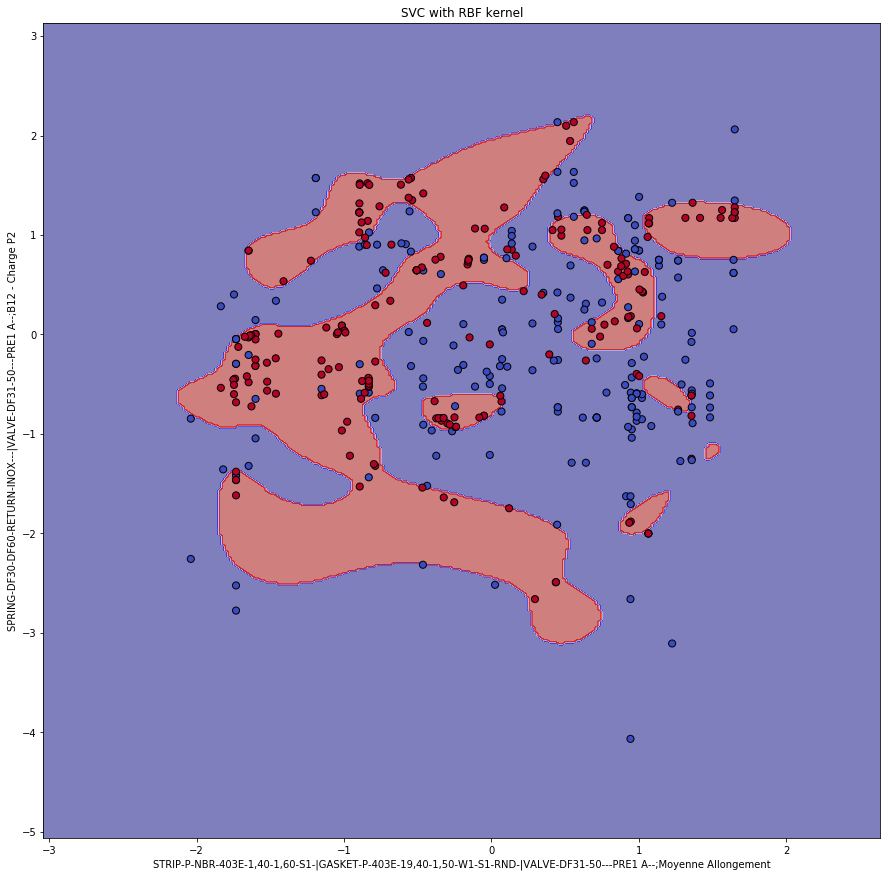

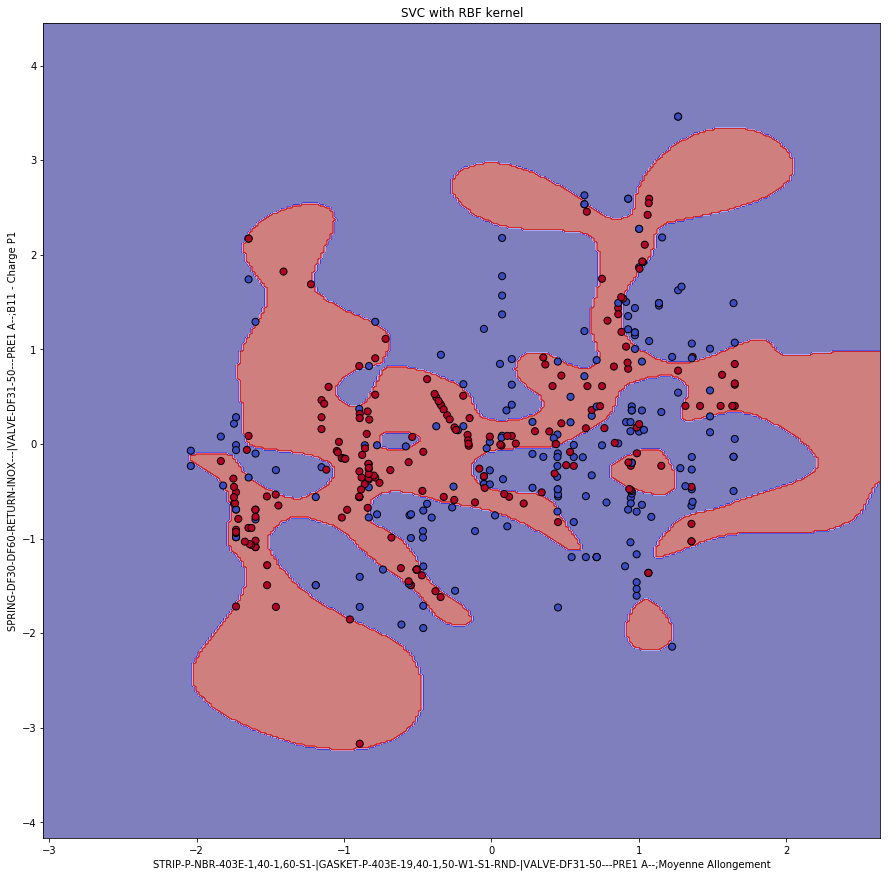

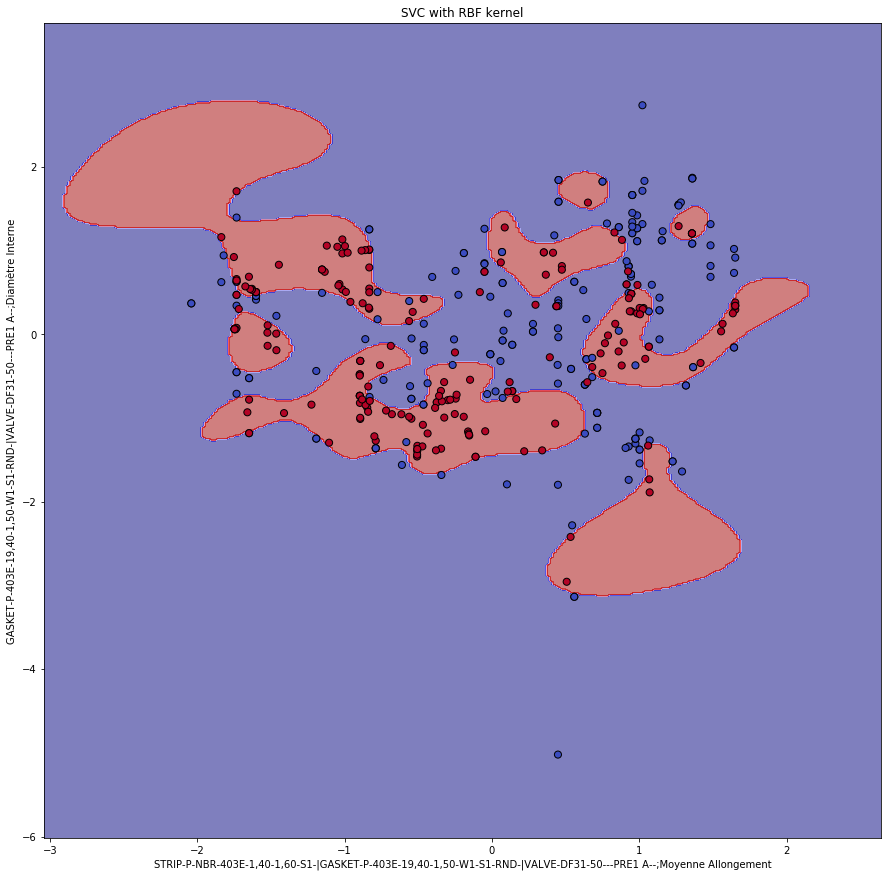

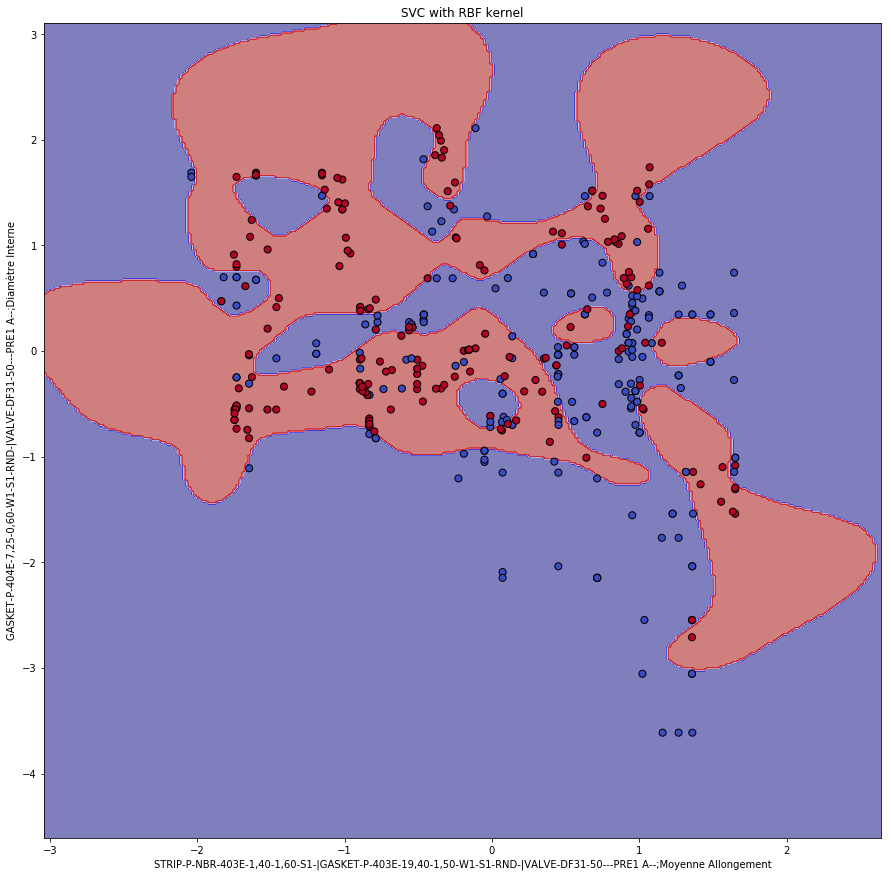

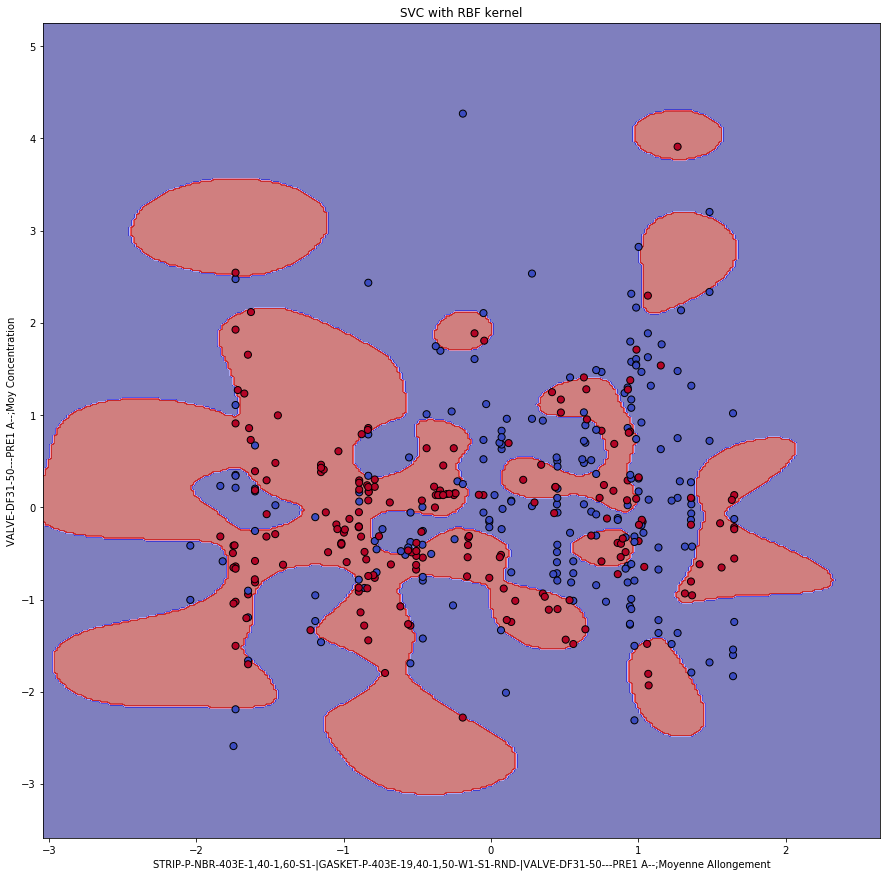

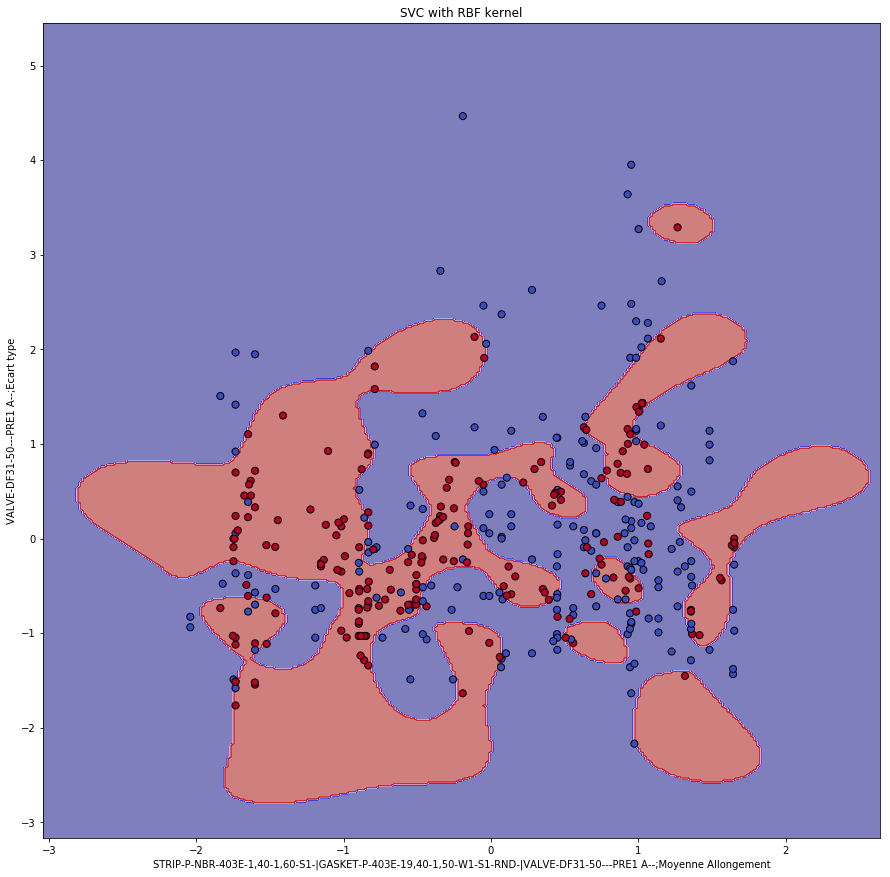

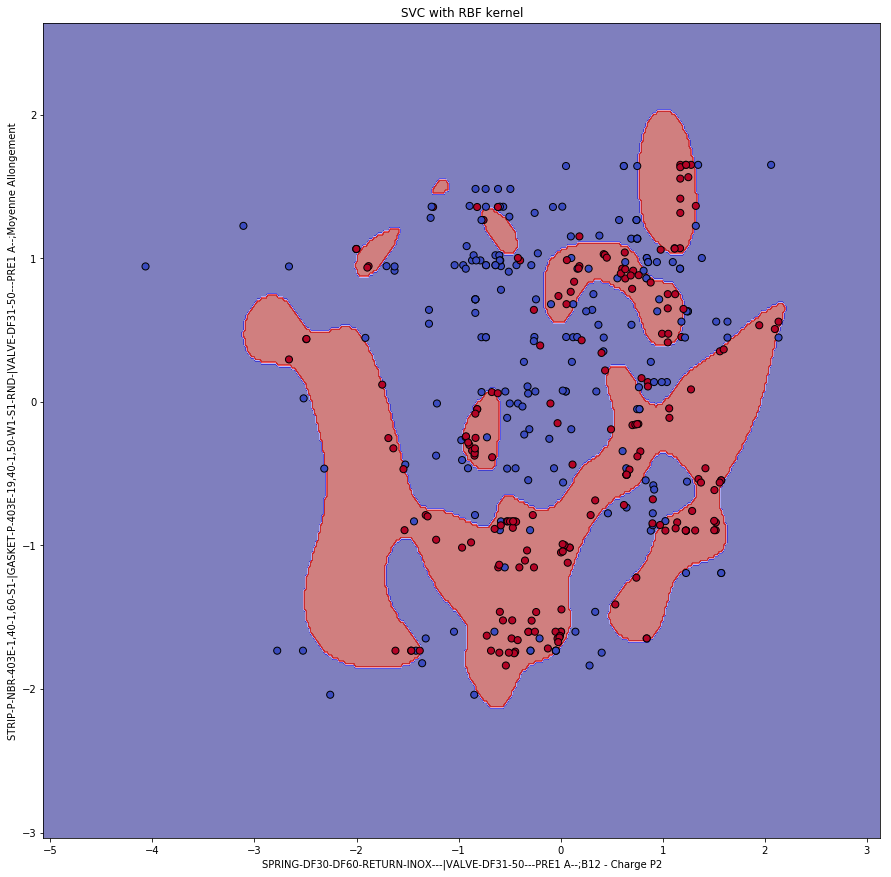

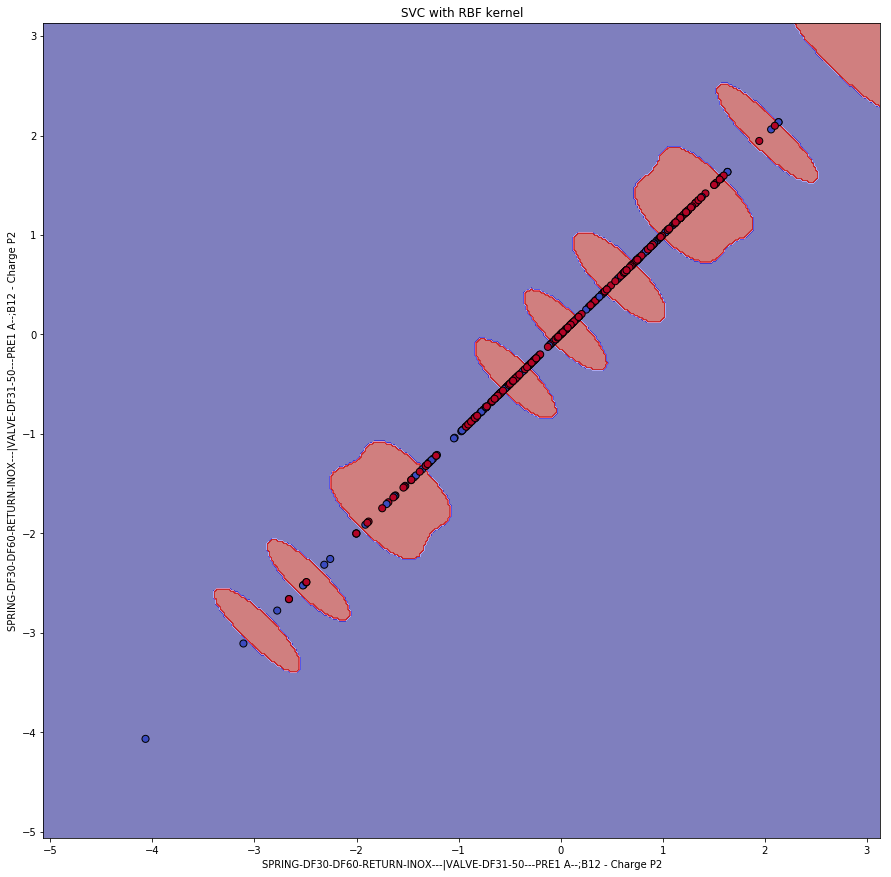

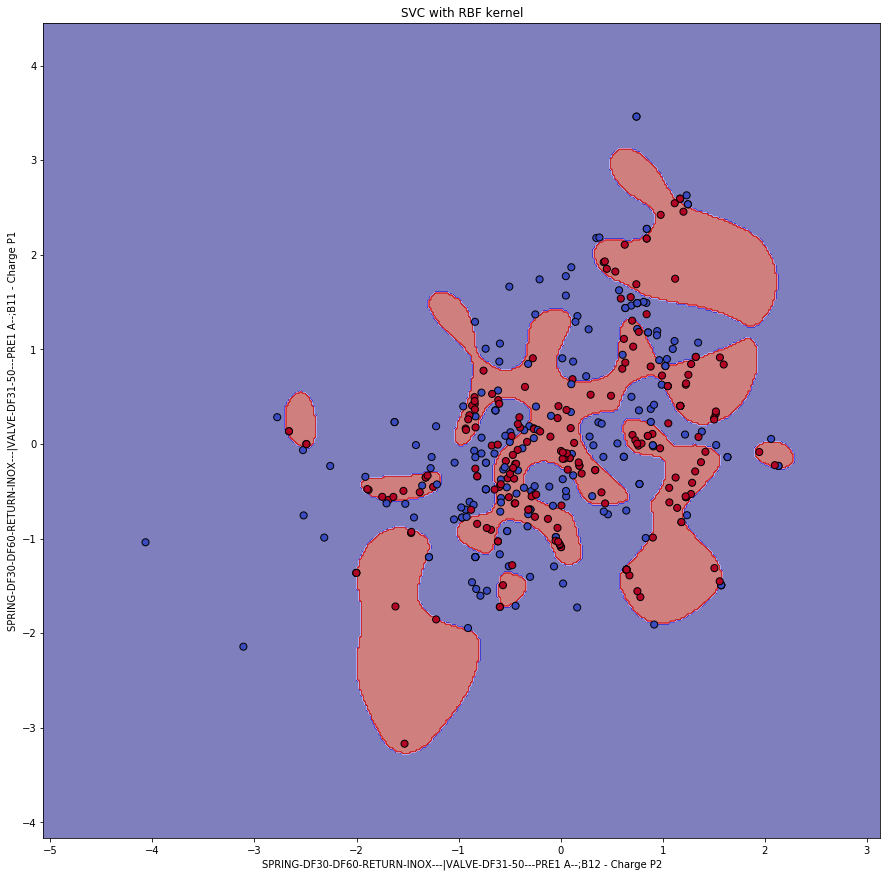

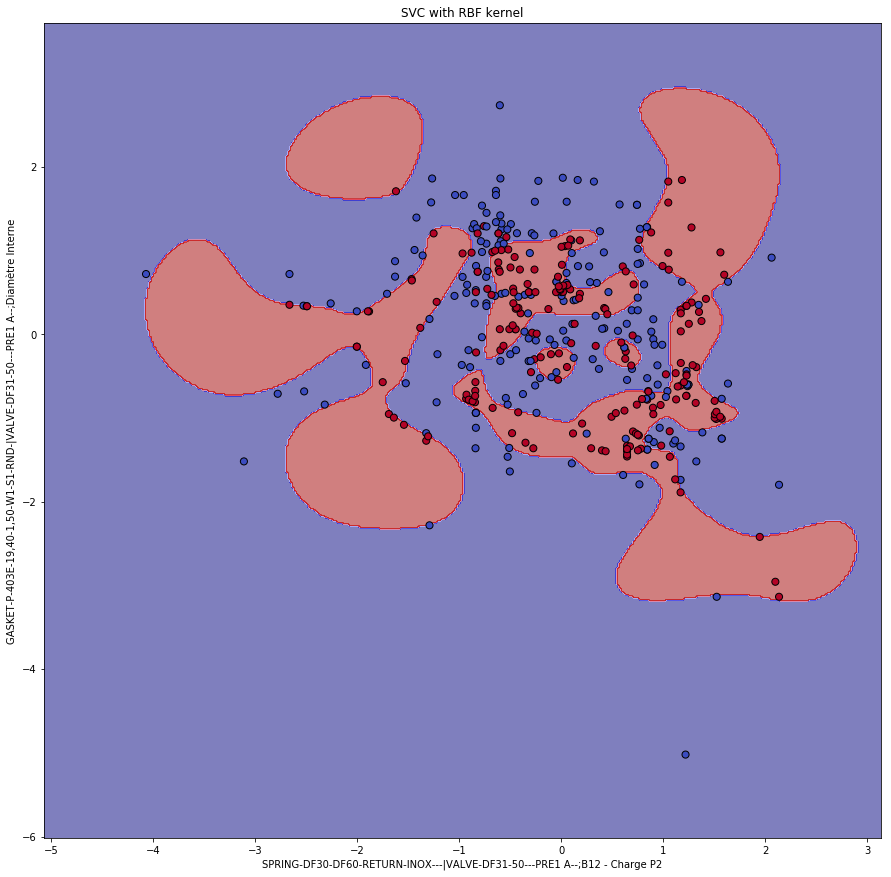

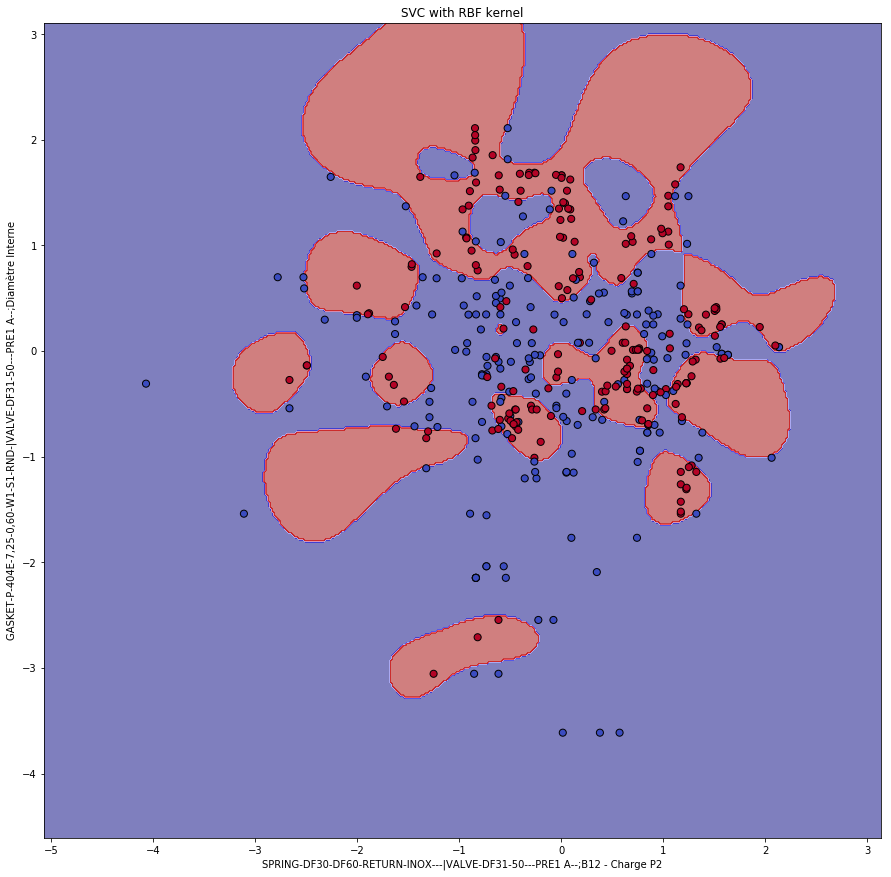

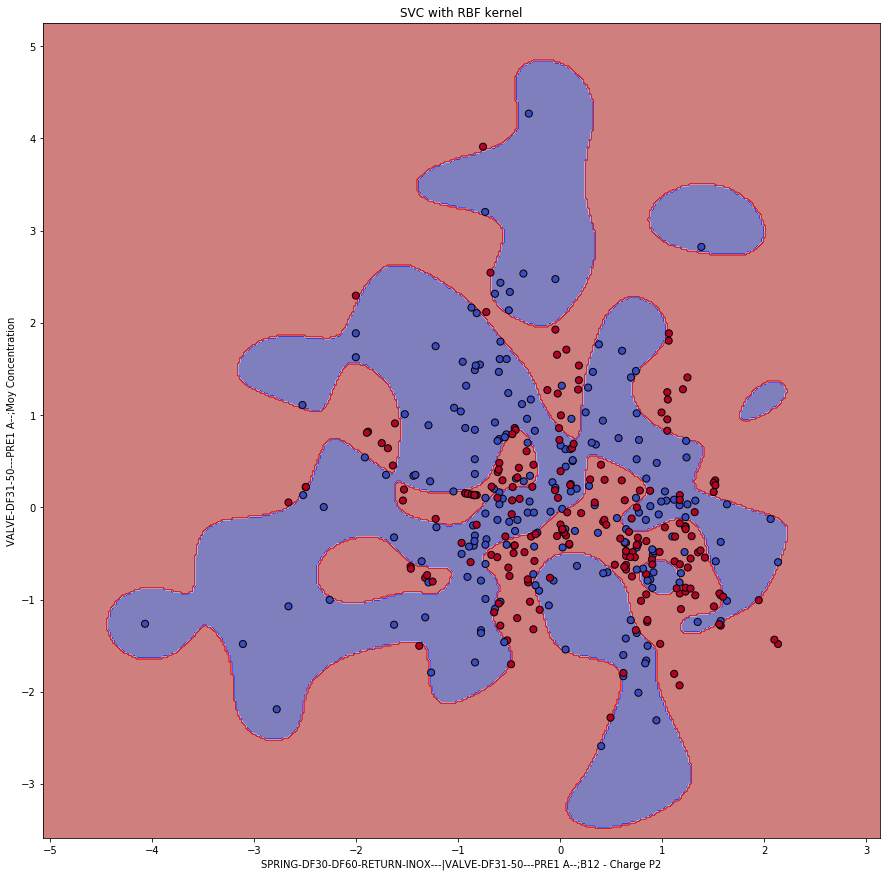

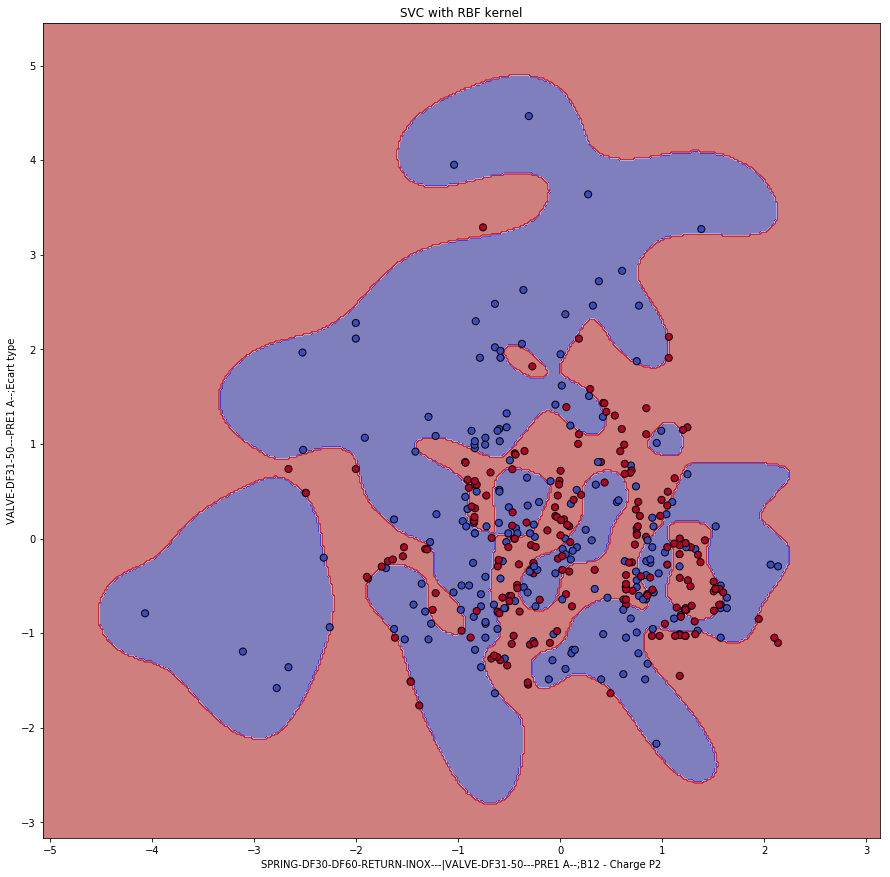

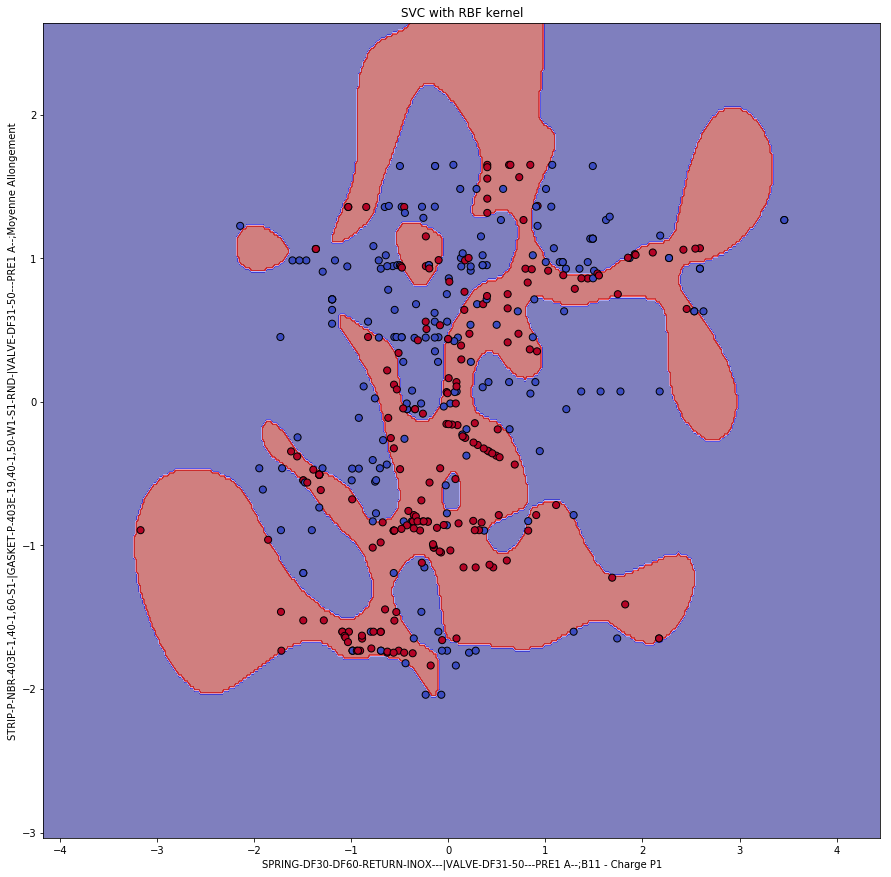

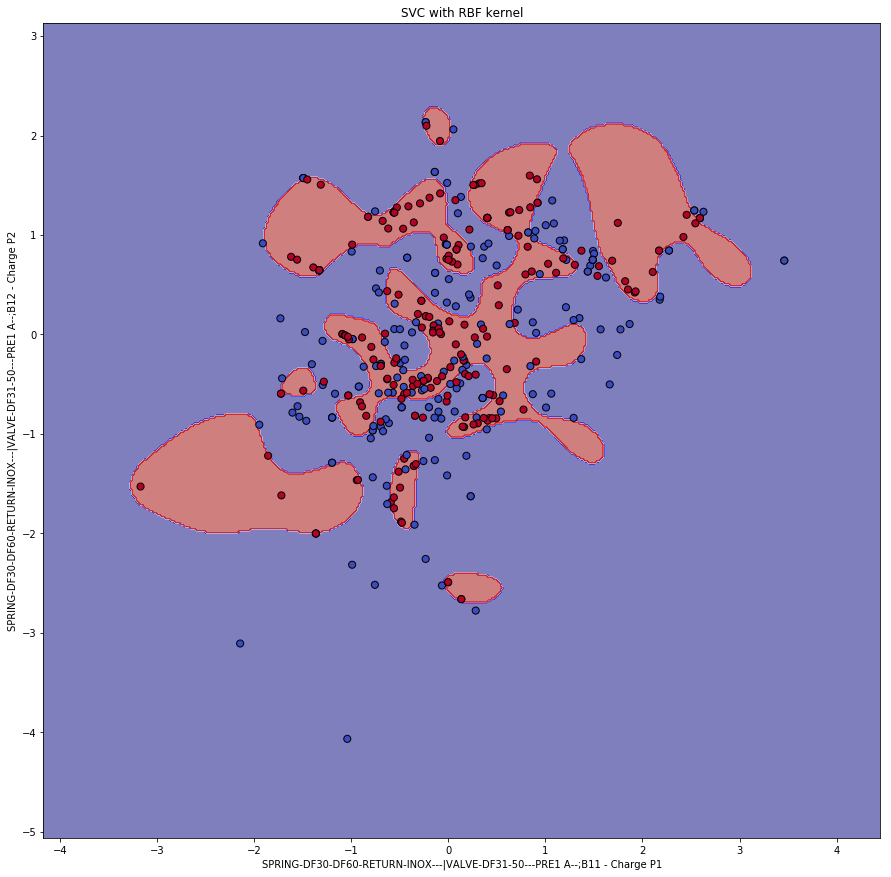

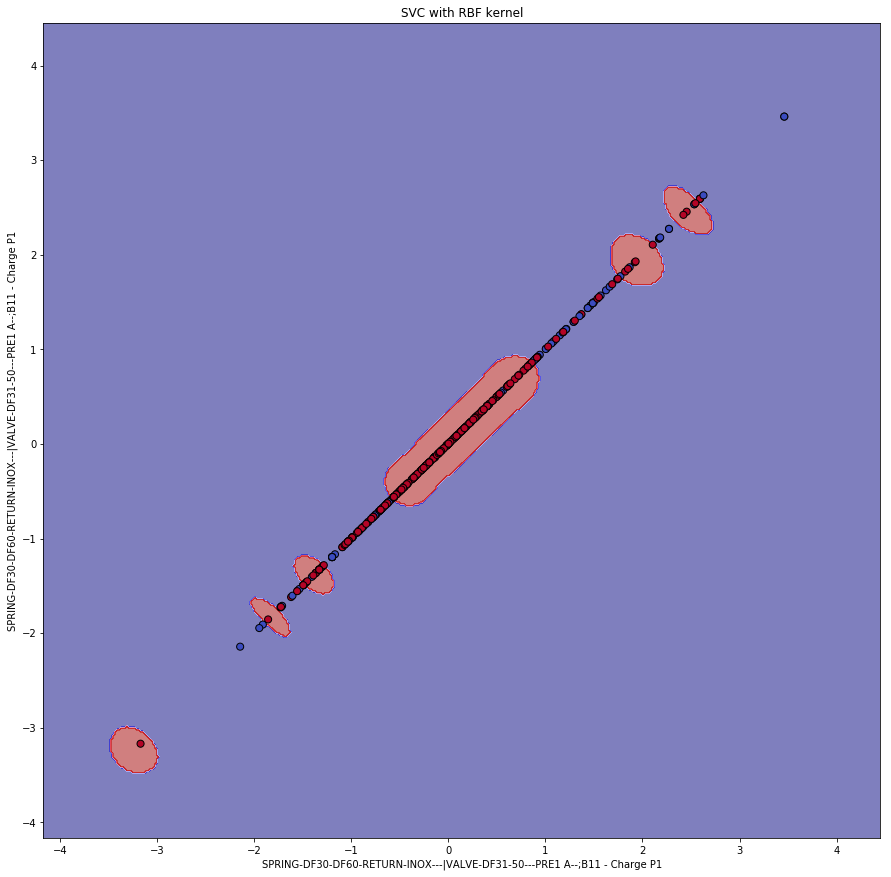

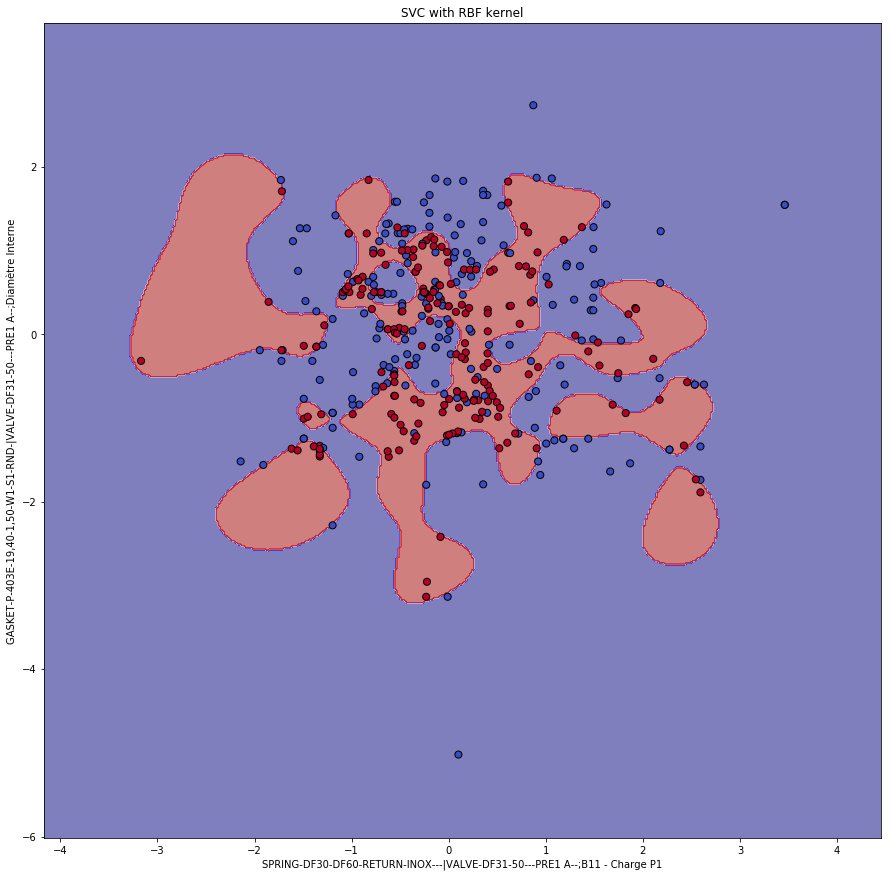

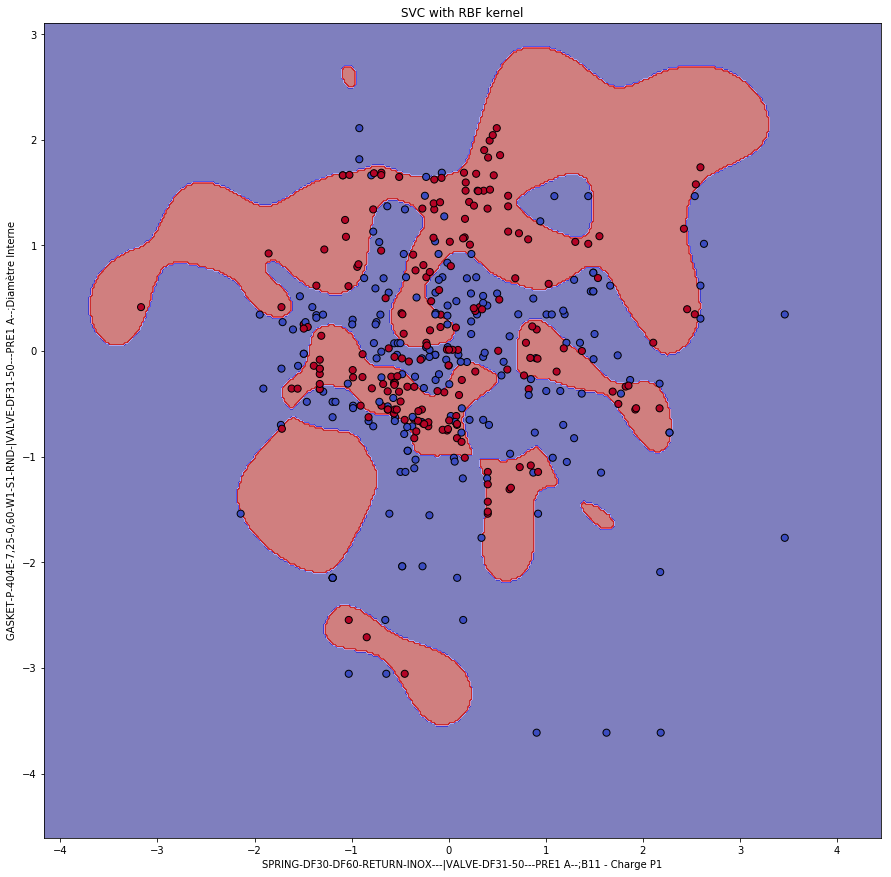

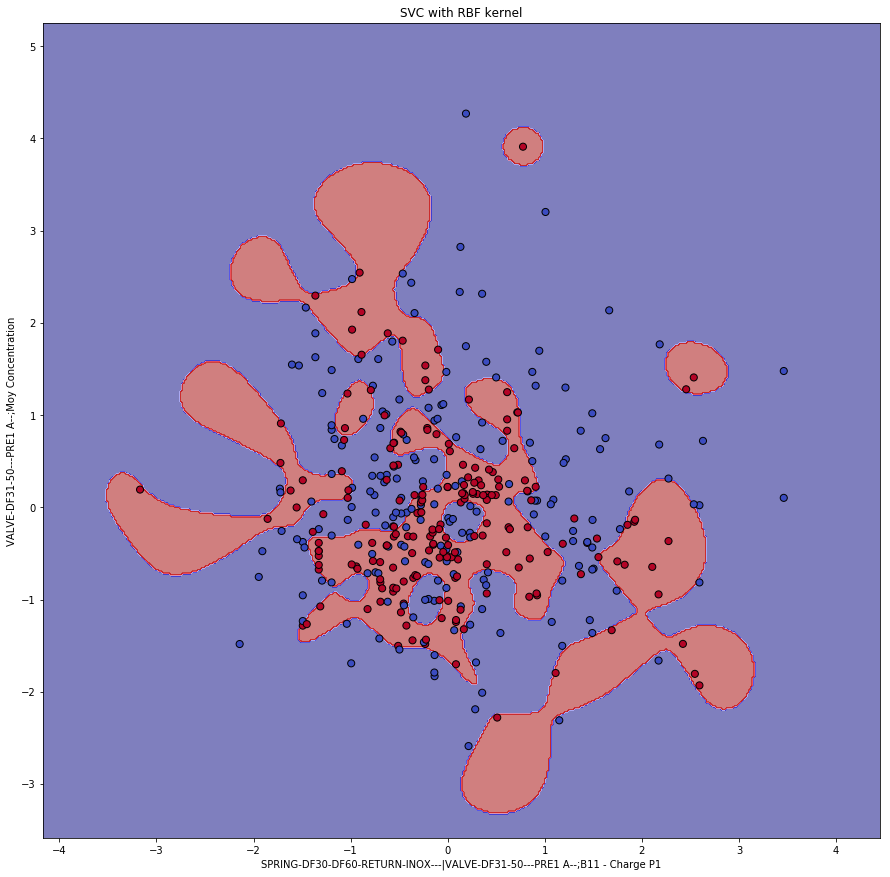

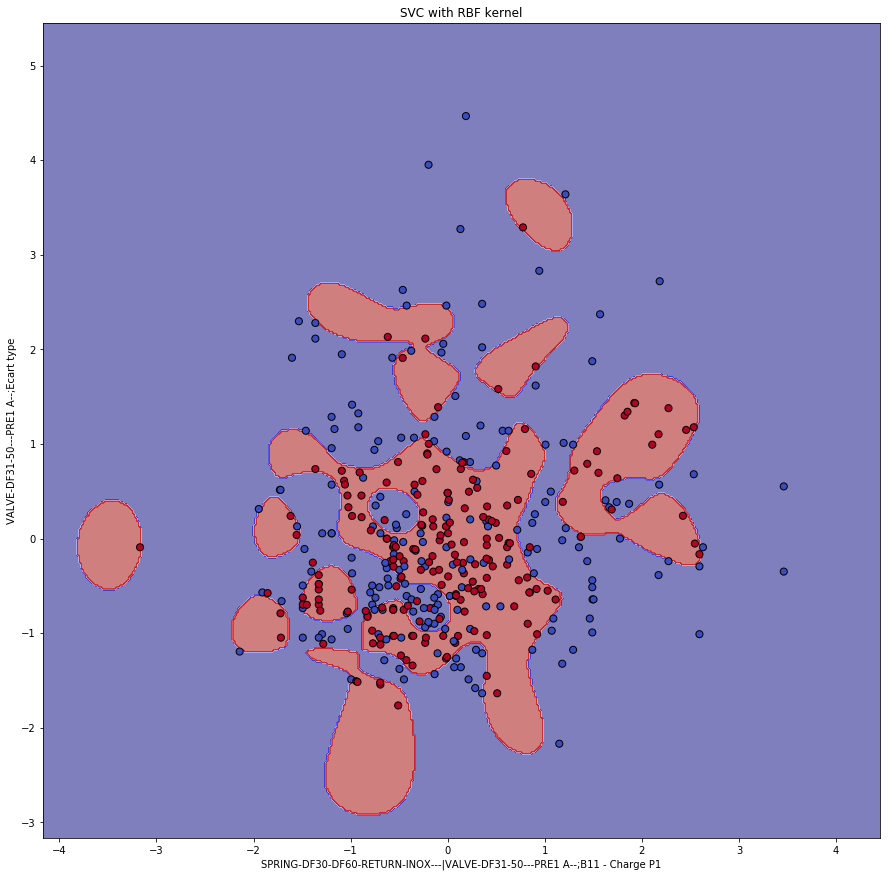

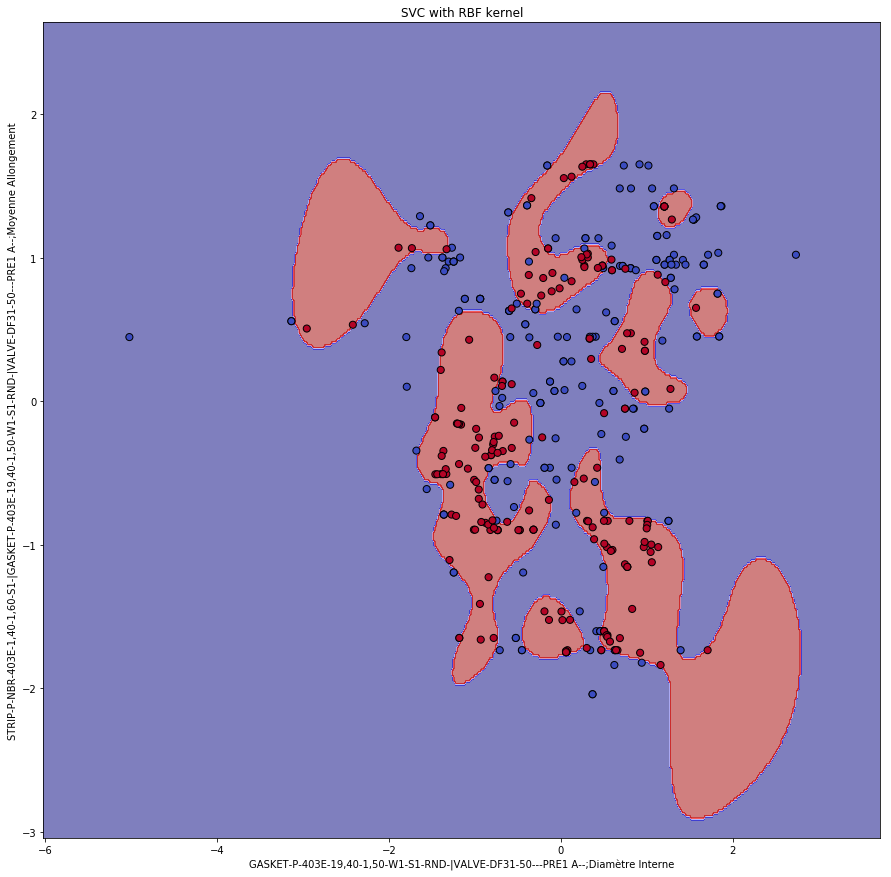

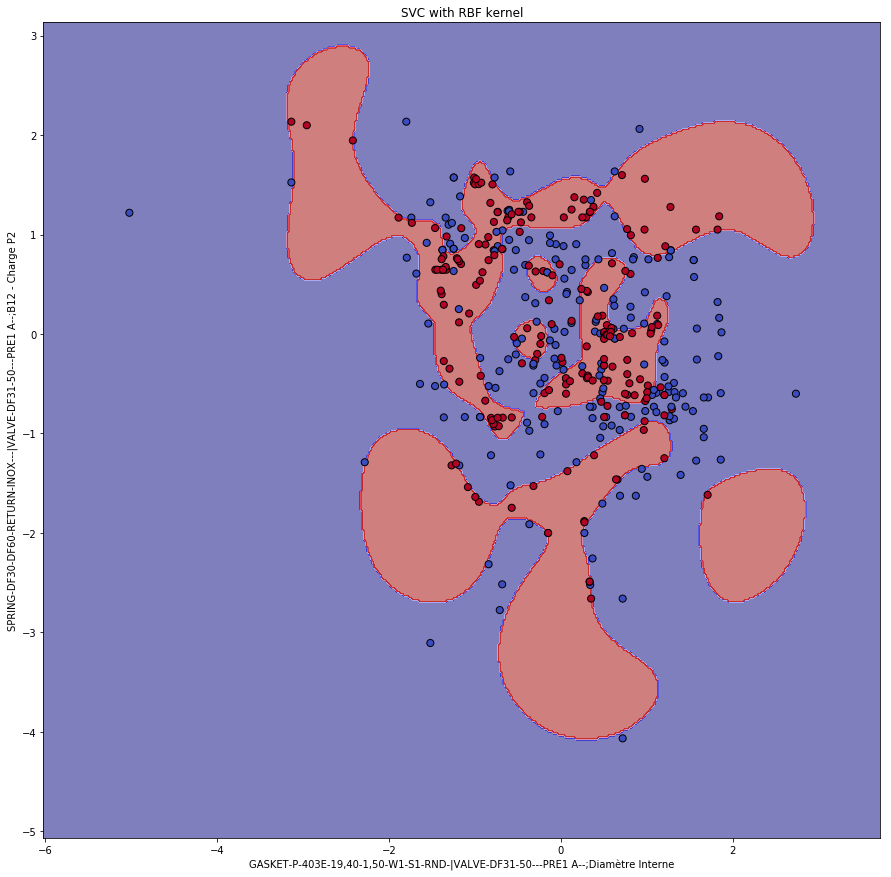

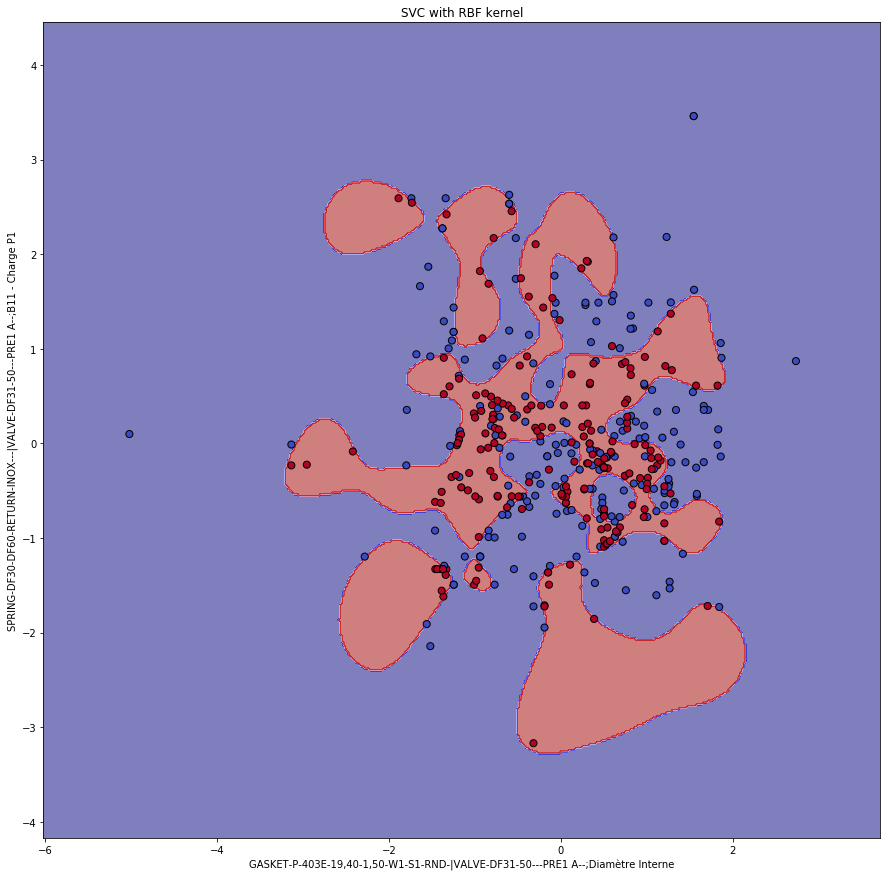

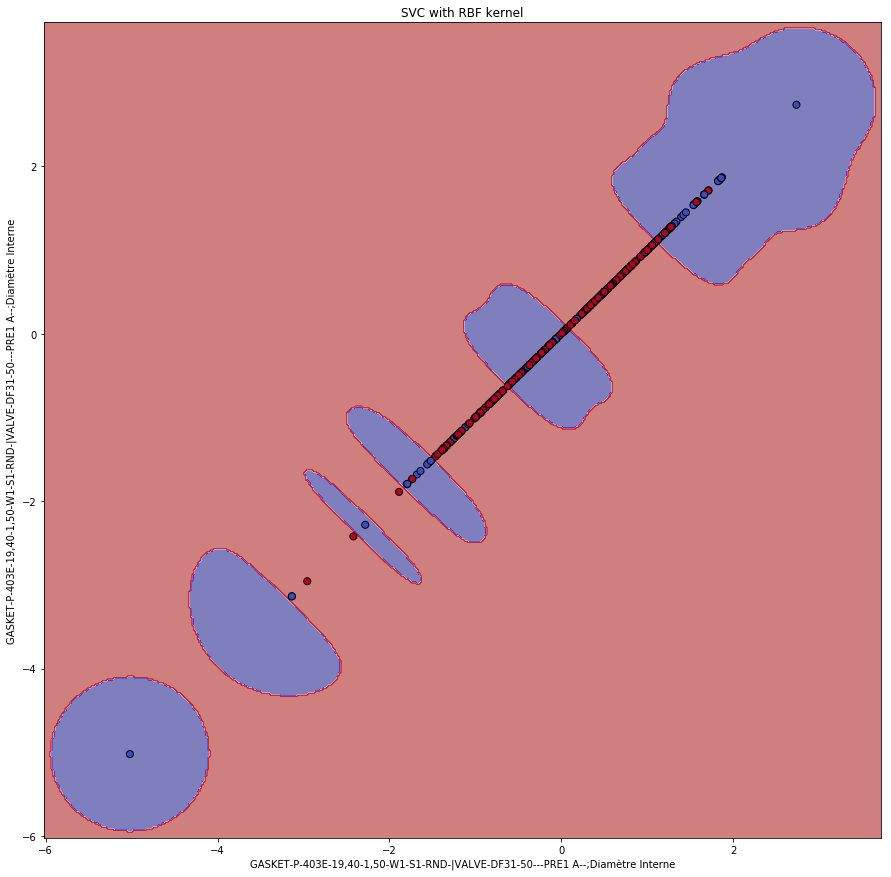

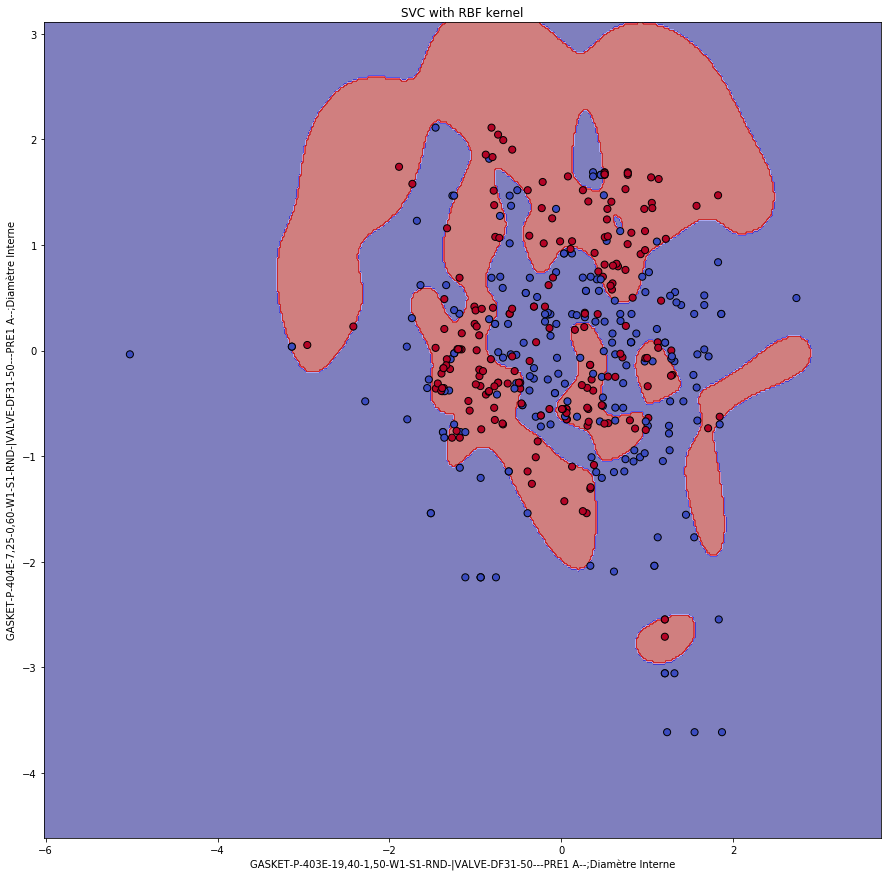

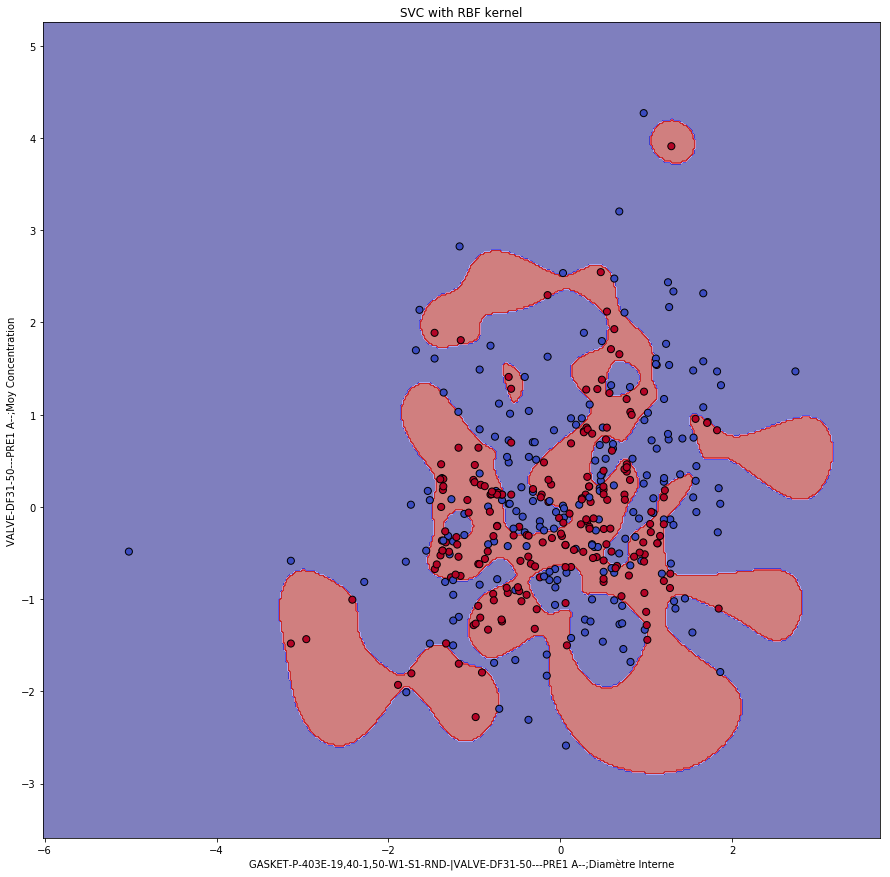

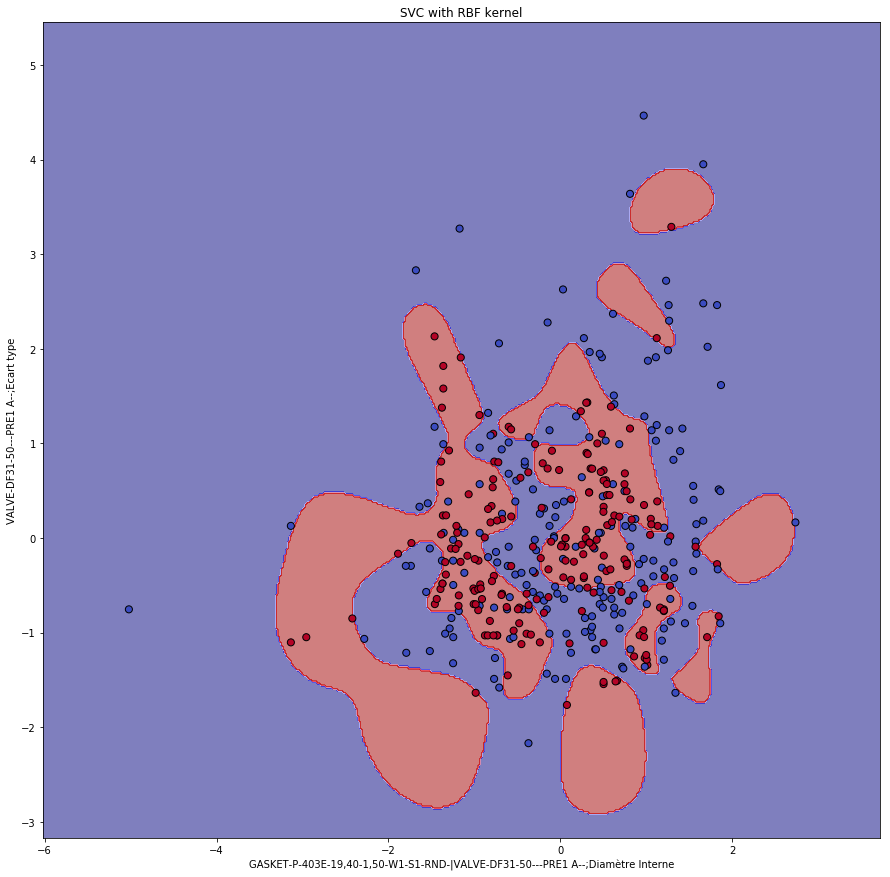

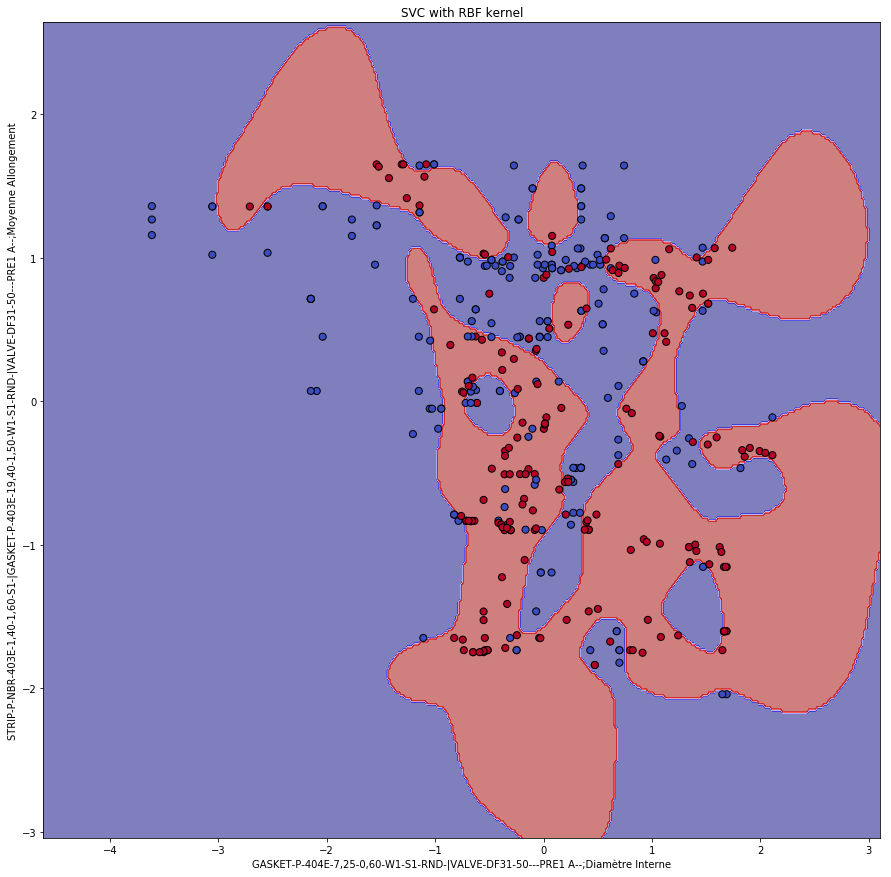

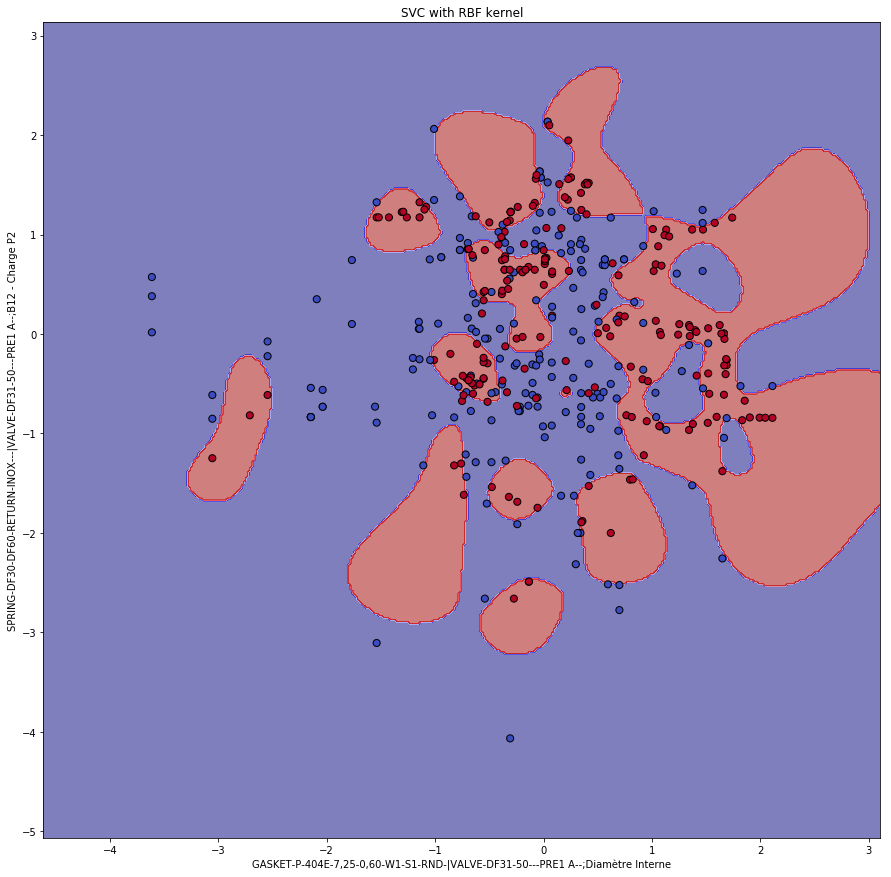

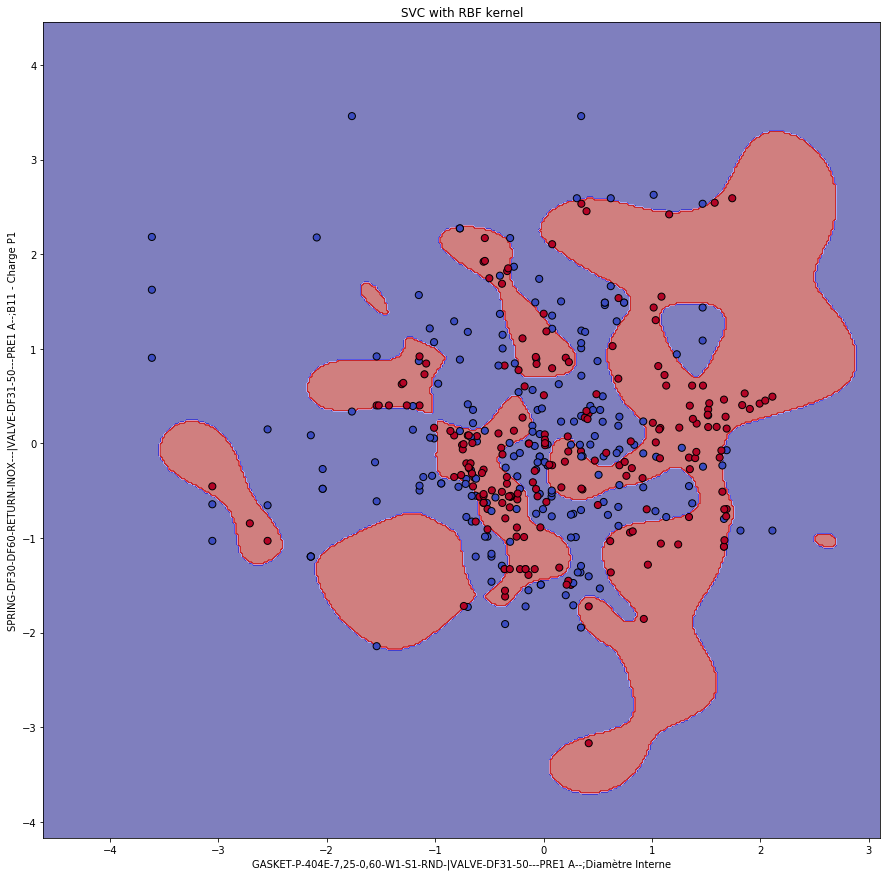

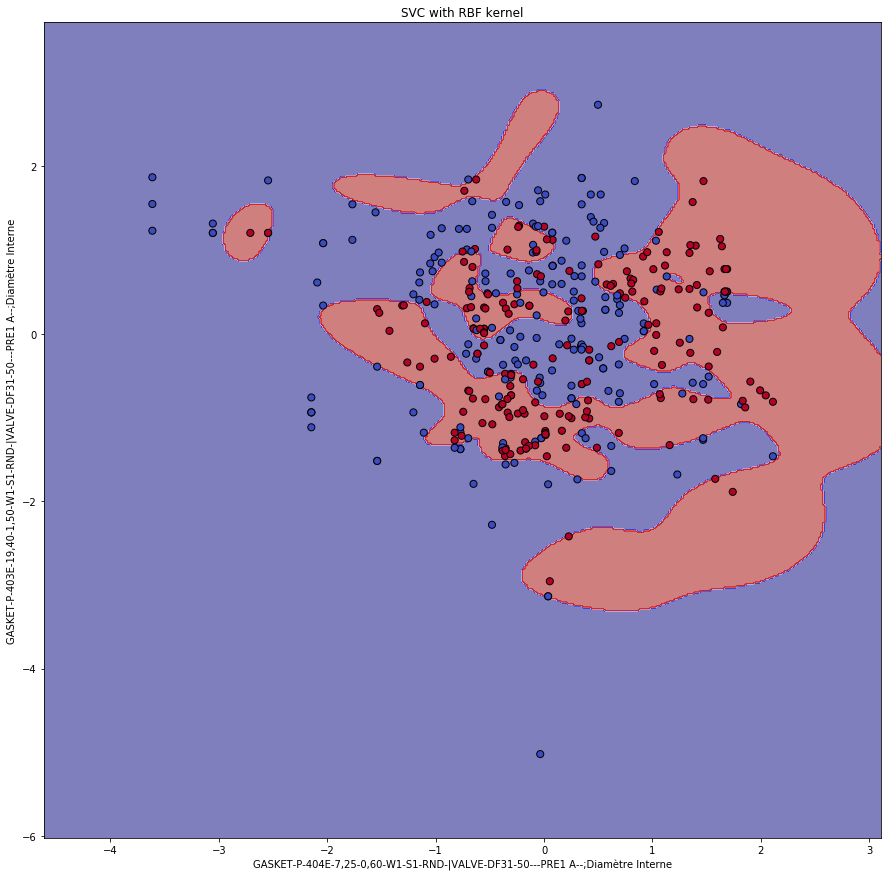

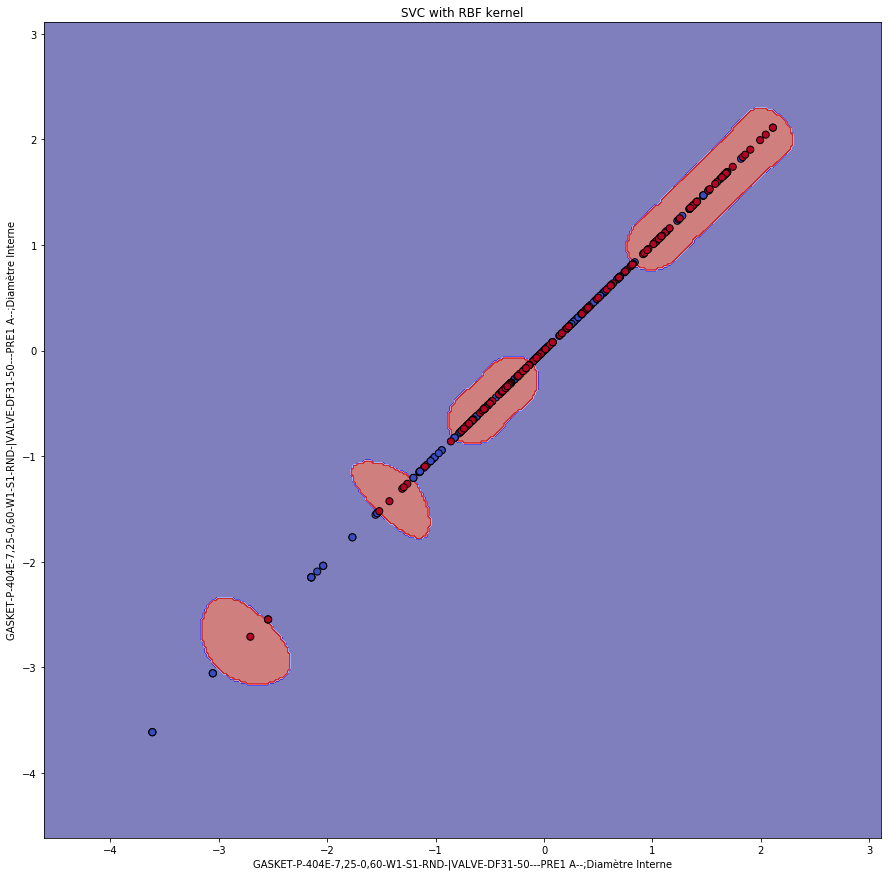

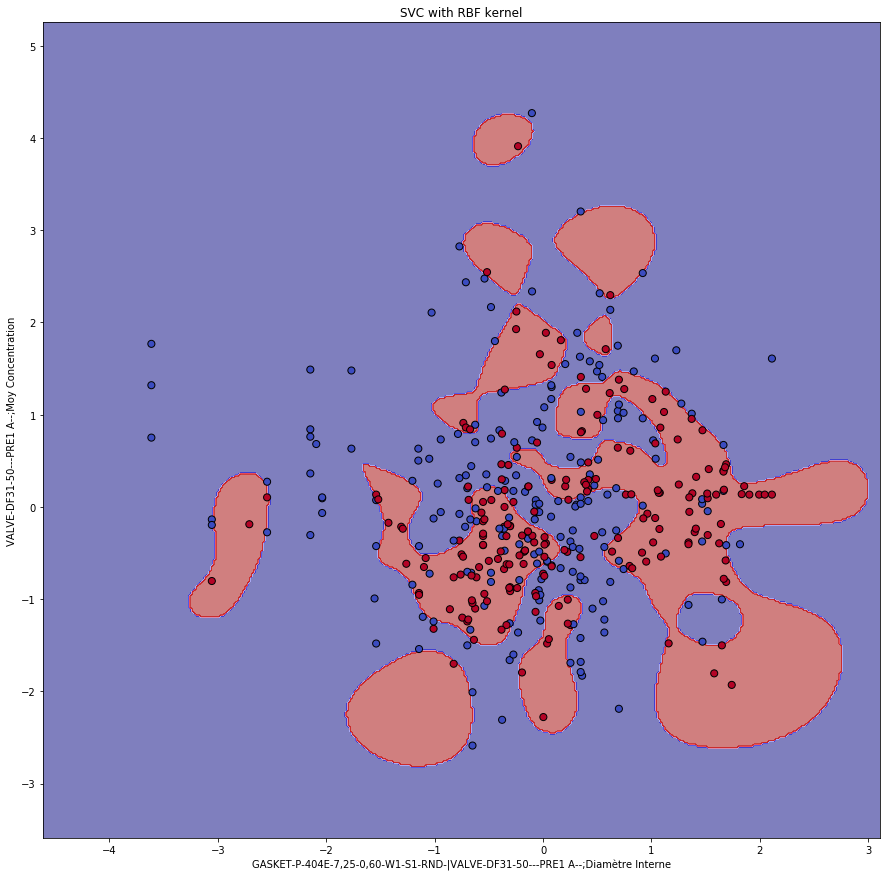

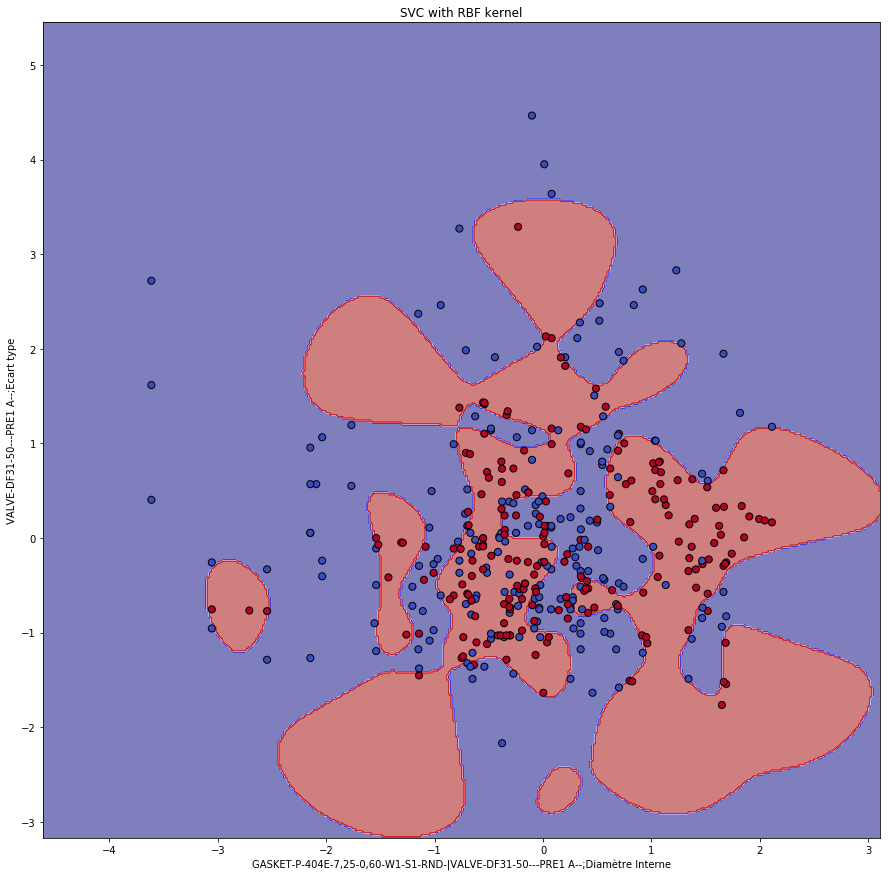

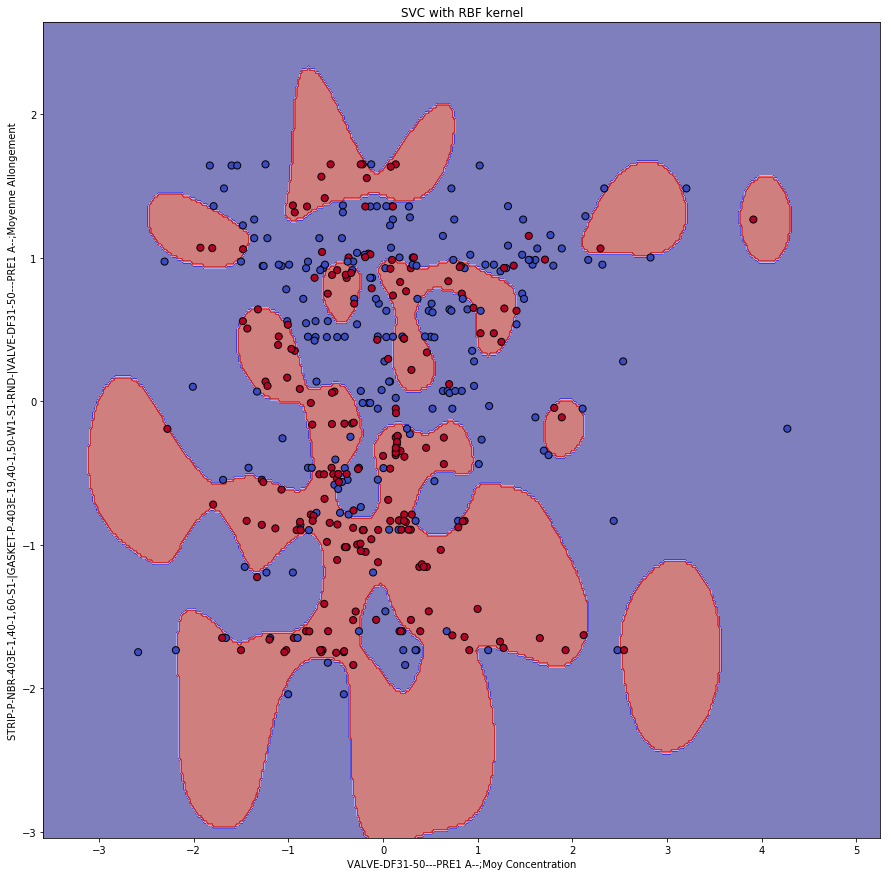

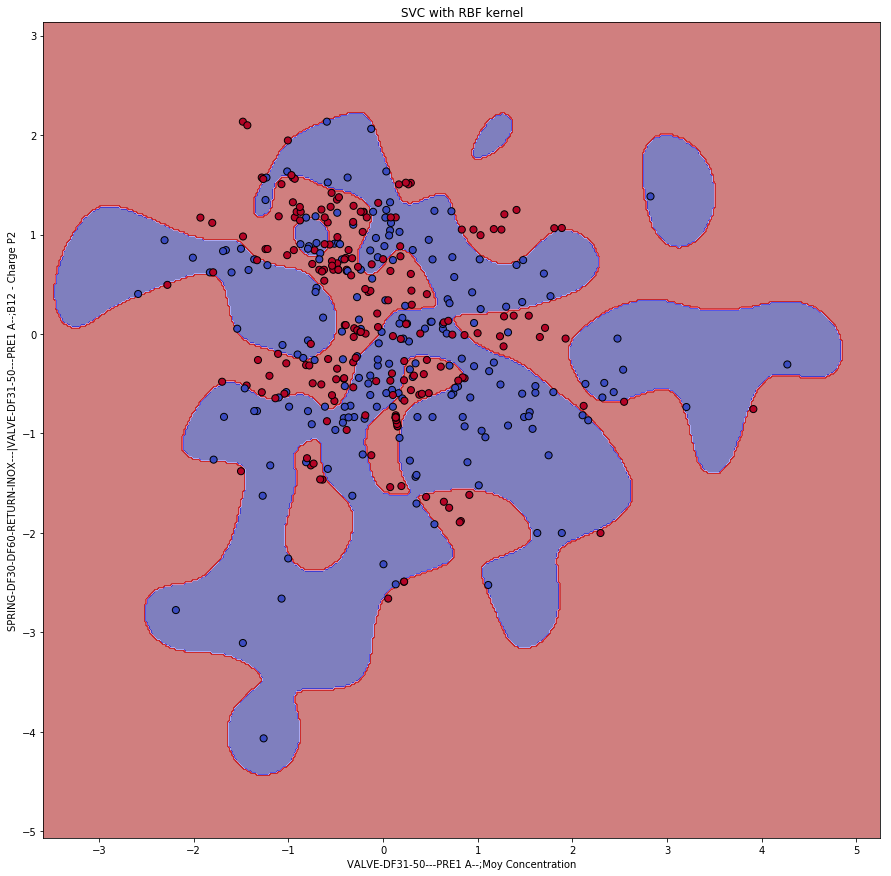

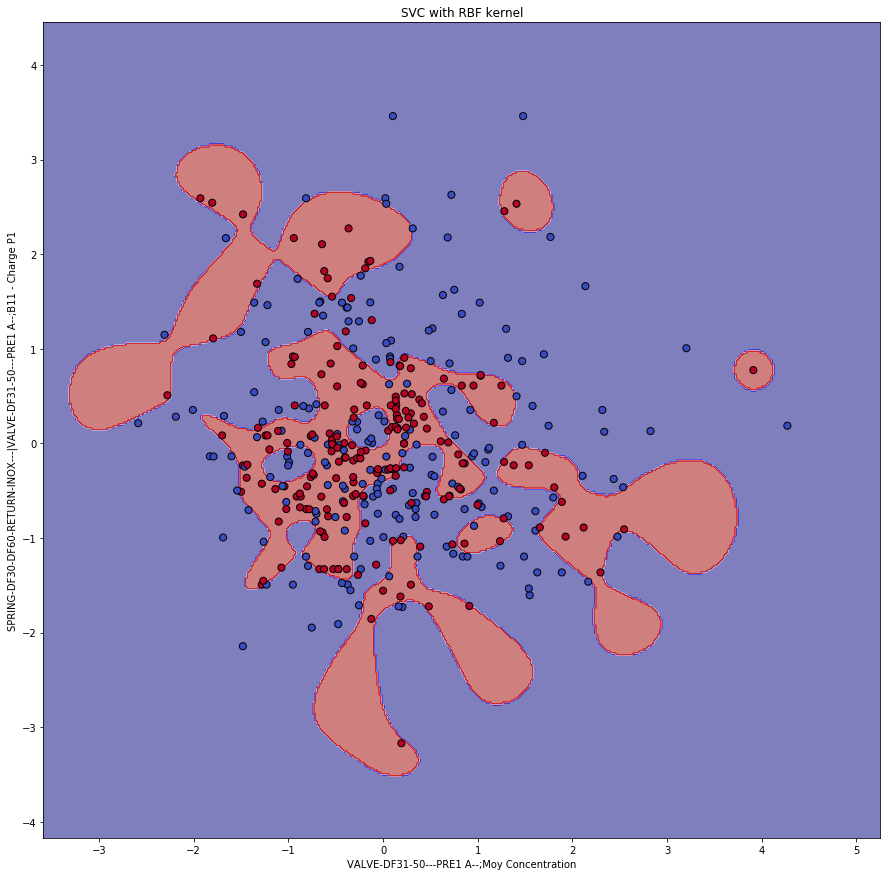

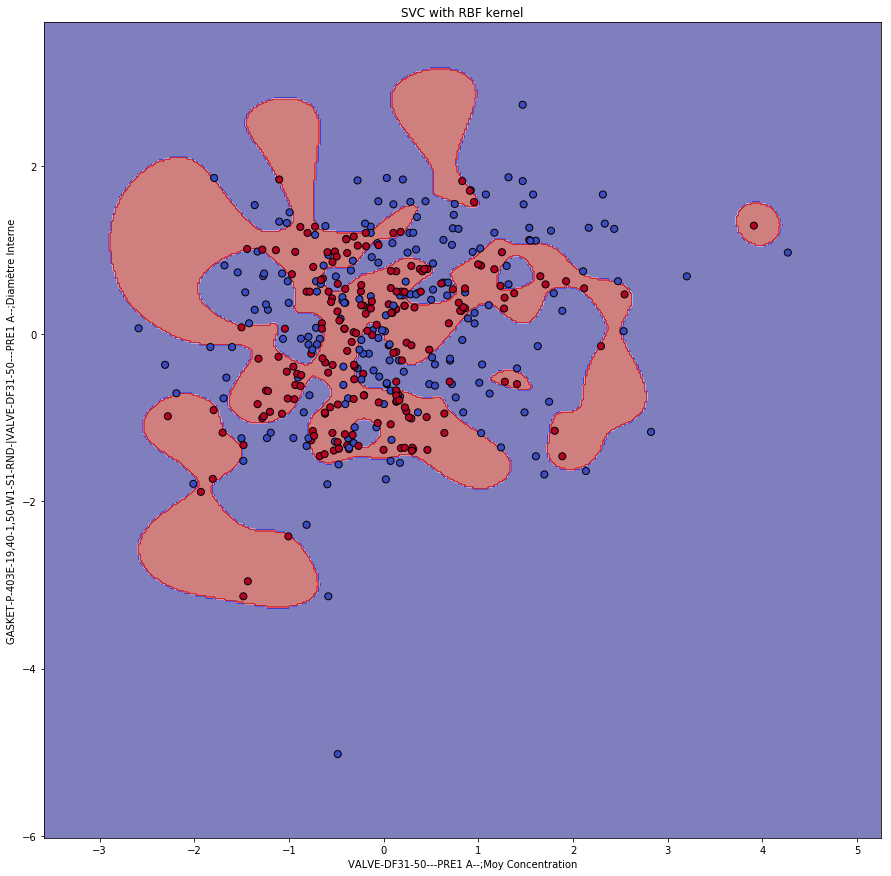

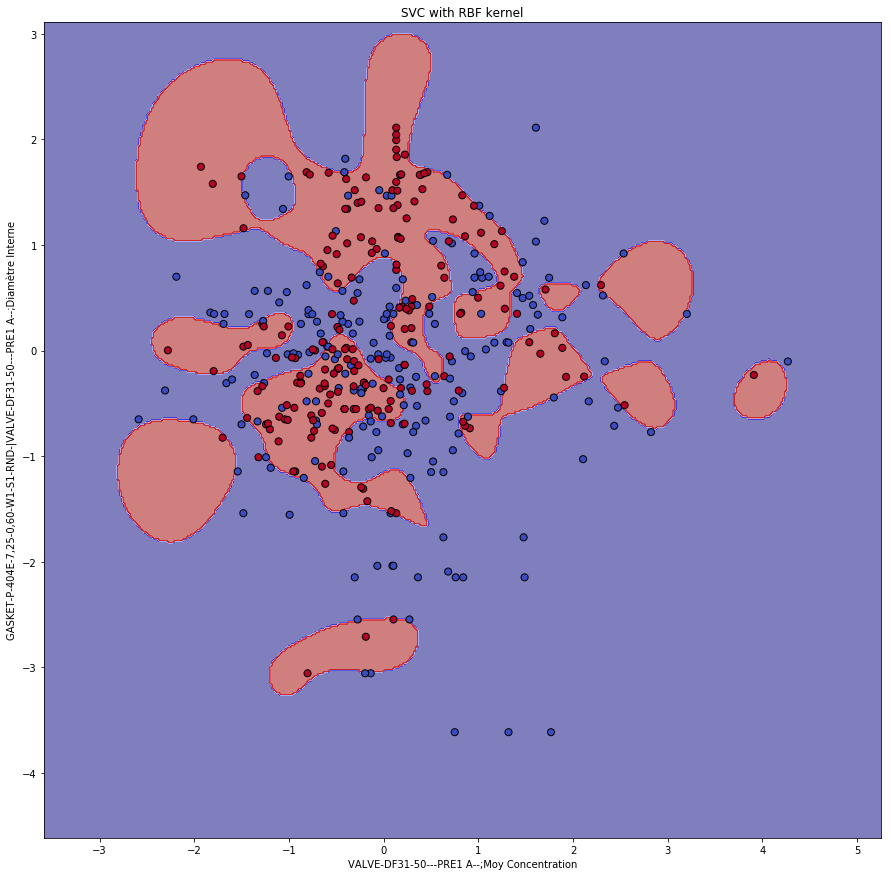

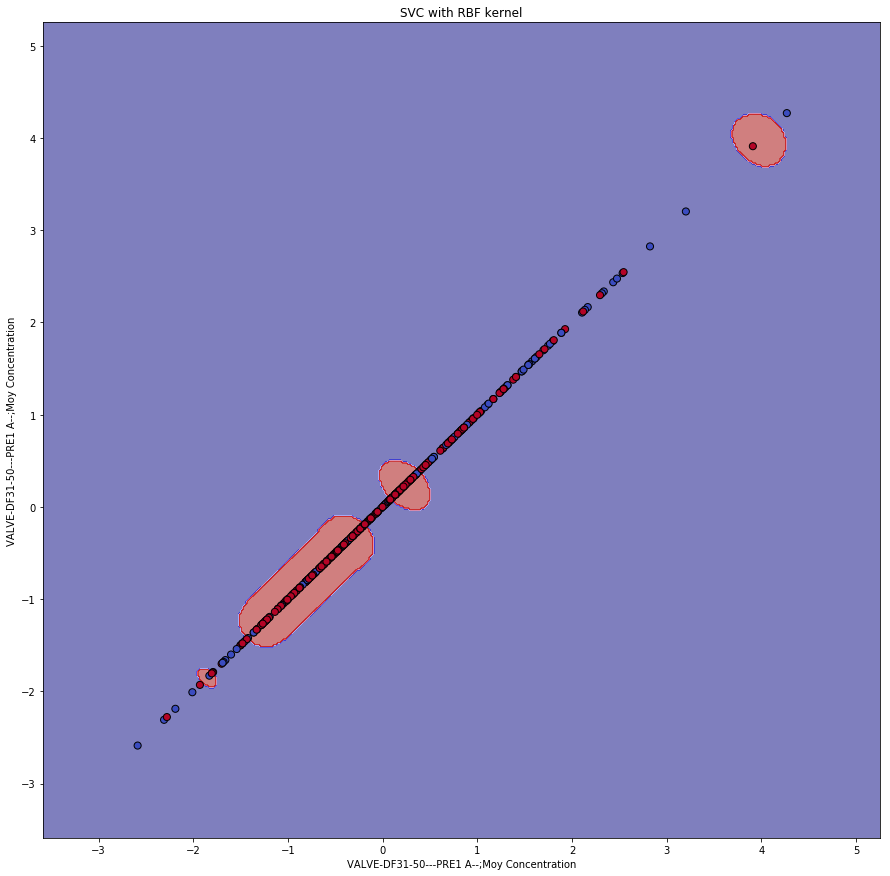

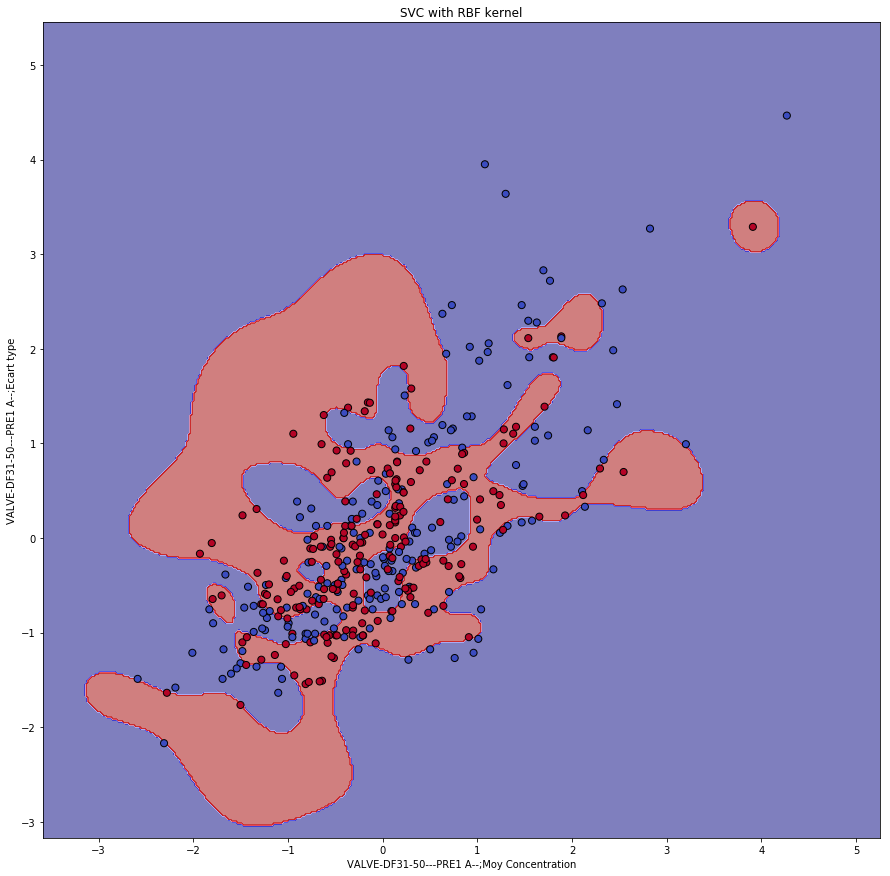

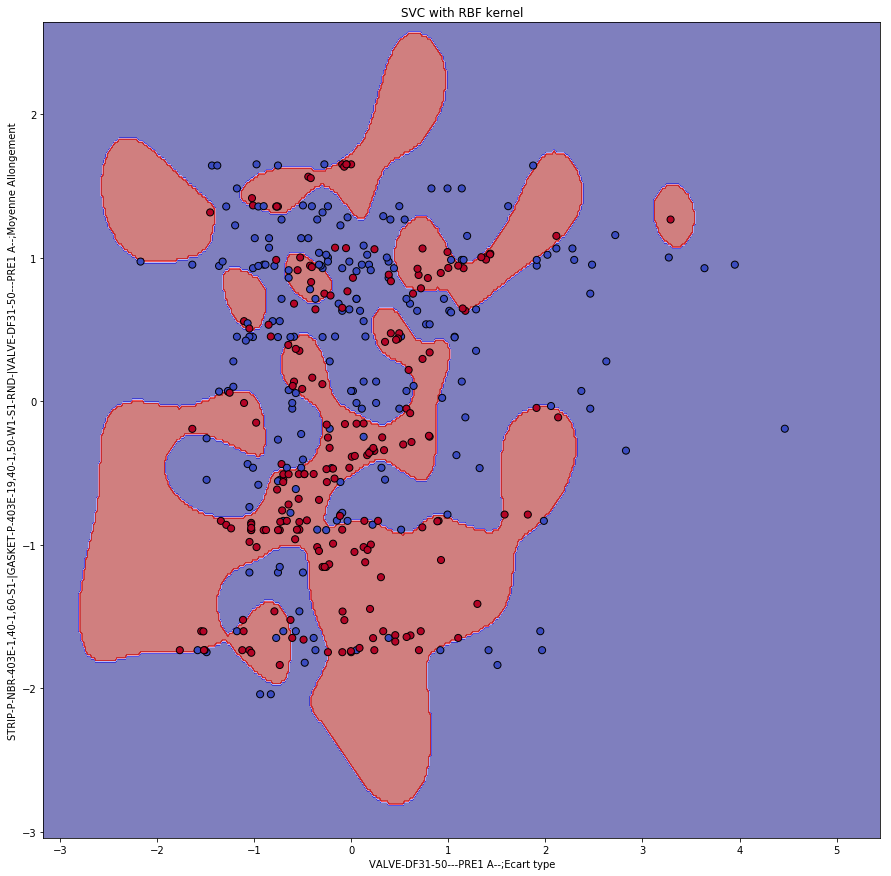

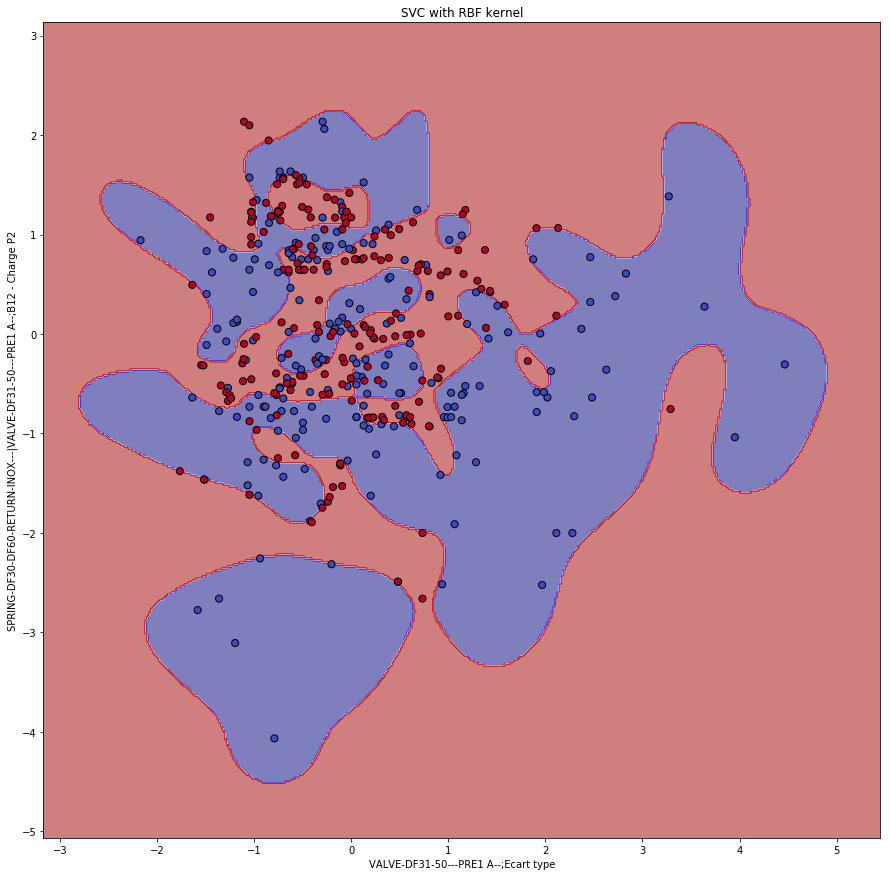

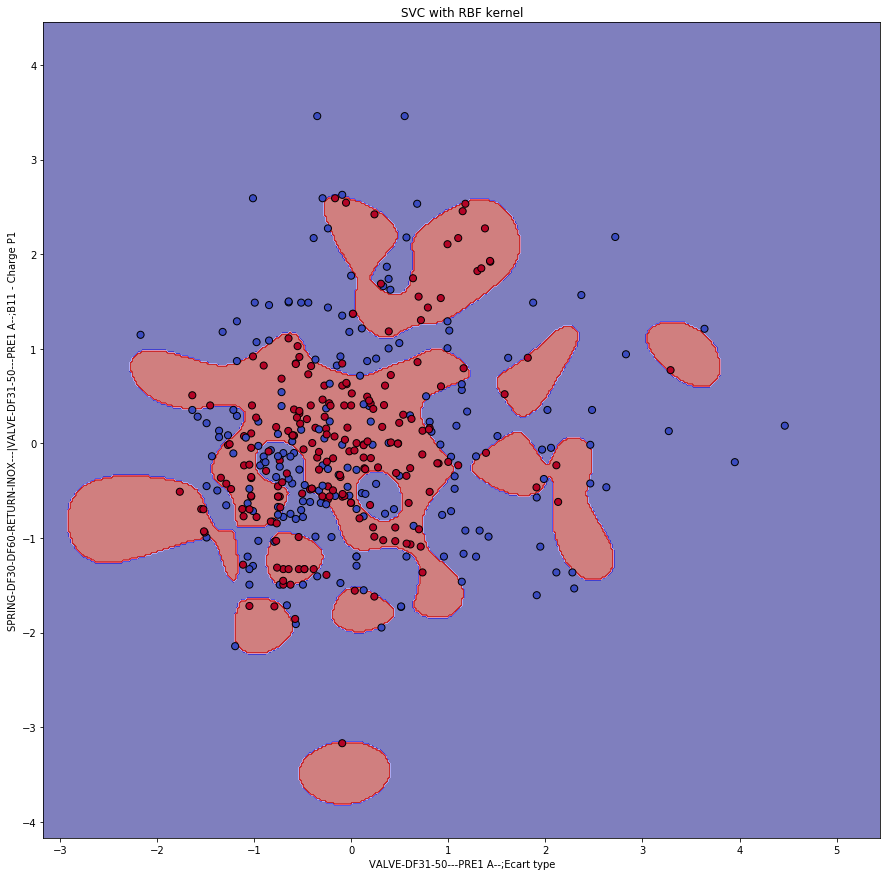

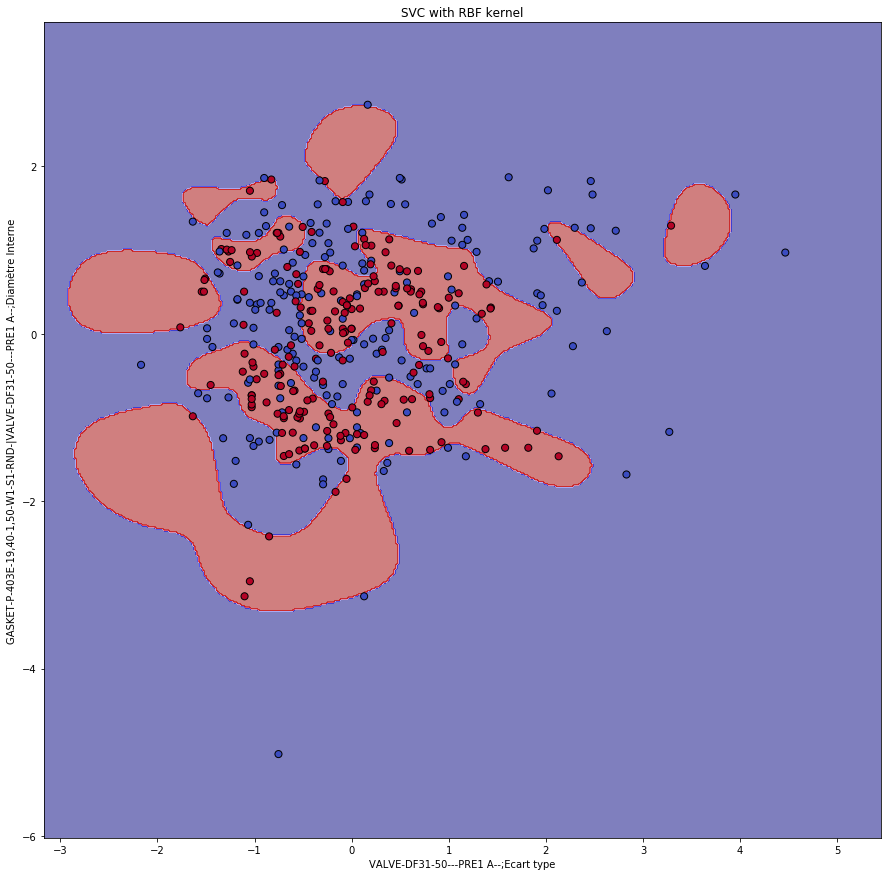

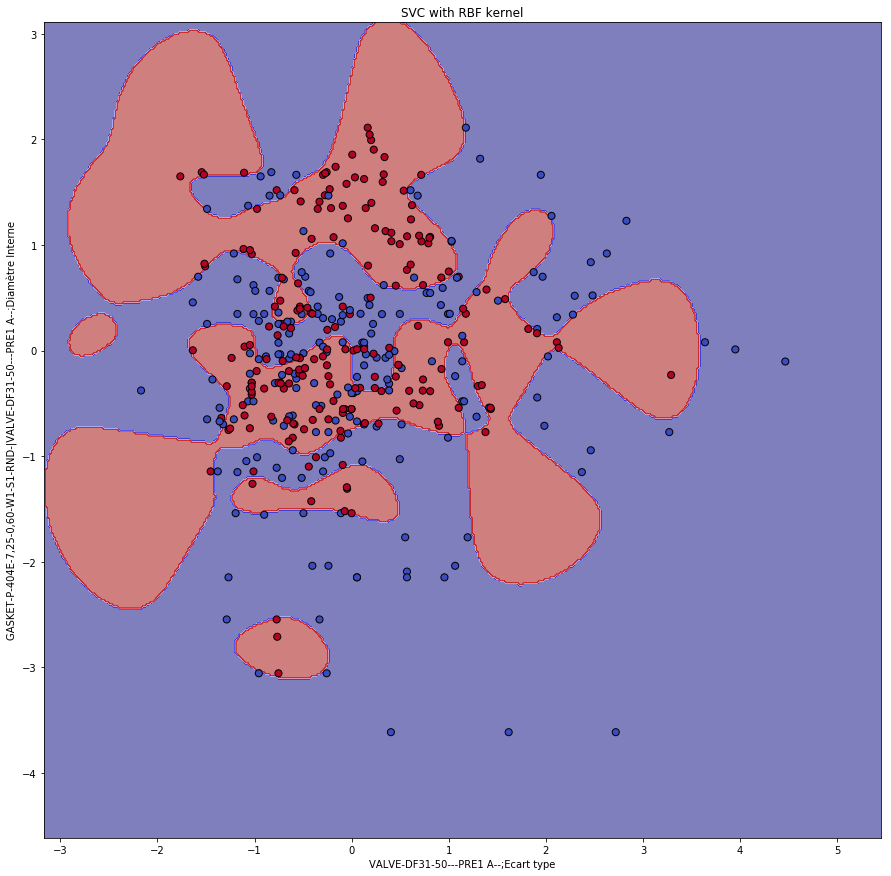

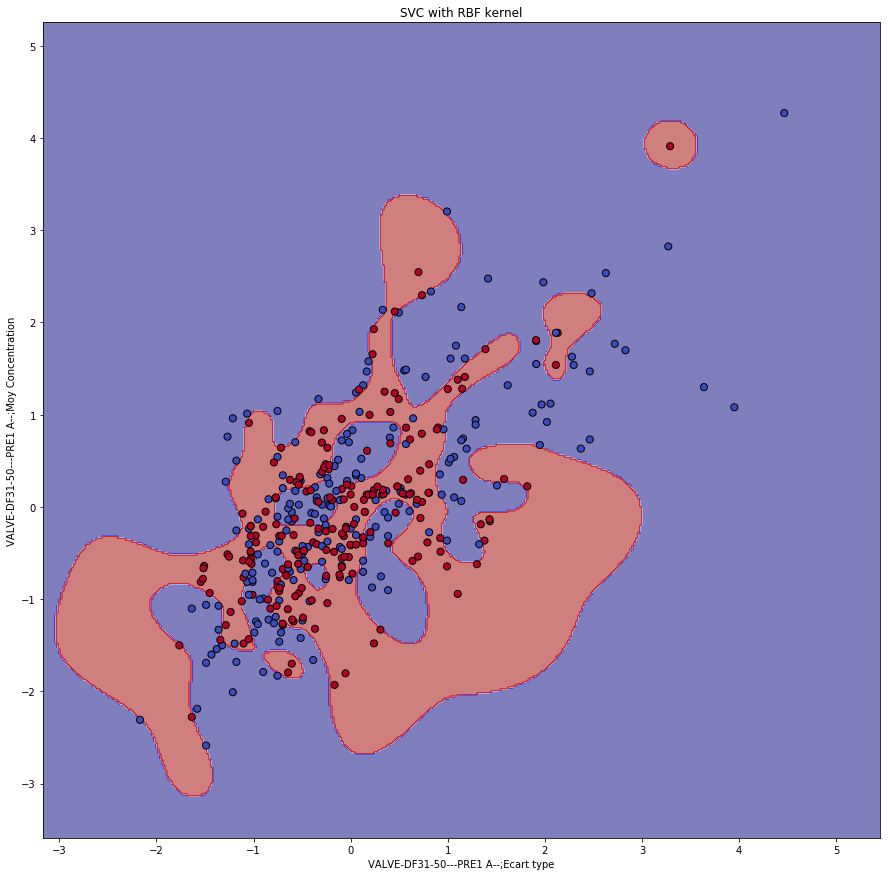

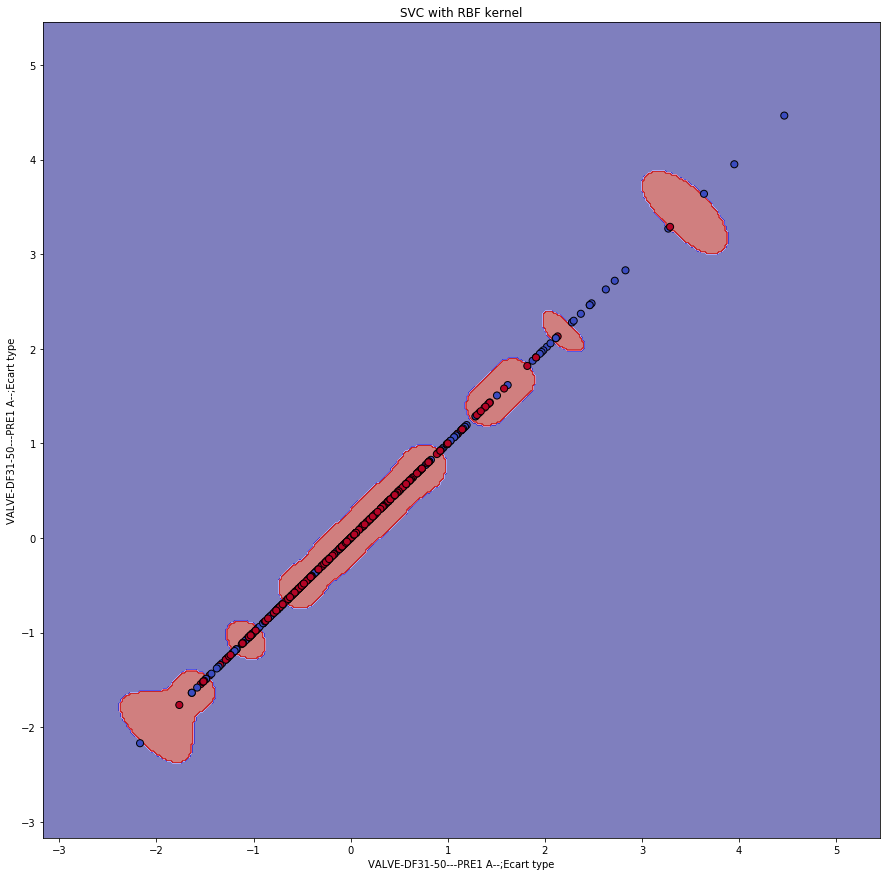

In [52]:
import matplotlib.ticker as ticker

def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

X = df_results.drop(columns=['Y'])
y = list(map(int,df_results['Y'].tolist()))


for i in range(len(X.columns)):
    for j in range(len(X.columns)):
        name_col = []
        name_col.append(df_column_name['names'][df_column_name['columns'] == X.columns[i]].tolist()[0])
        name_col.append(df_column_name['names'][df_column_name['columns'] == X.columns[j]].tolist()[0])
    
        x_train = X[[X.columns[i], X.columns[j]]]
        
        scaler = StandardScaler()
        x_train_plot = scaler.fit_transform(x_train)
        #x_train_plot = x_train.as_matrix()
        
        # data since we want to plot the support vectors
        C = 10000  # SVM regularization parameter
        clf = svm.SVC(probability=True, gamma=gamma, kernel='rbf',C=C)

        clf.fit(x_train_plot, y) 

        # title for the plots
        title = 'SVC with RBF kernel'

        # Set-up 2x2 grid for plotting.
        fig = plt.figure(figsize=(15,15))
        ax = fig.gca()

        X0, X1 = x_train_plot[:, 0], x_train_plot[:, 1]
        xx, yy = make_meshgrid(X0, X1)

        plot_contours(ax, clf, xx, yy, cmap=plt.cm.seismic, alpha=0.5)
        ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=50, edgecolors='k')
        #ax.set_xlim(xx.min(), xx.max())
        #ax.set_ylim(yy.min(), yy.max())
        ax.set_xlabel(name_col[0])
        ax.set_ylabel(name_col[1])

        #ax.set_xticklabels(sorted(x_train.as_matrix()[:,0].tolist()))
        #ax.set_yticklabels(sorted(x_train.as_matrix()[:,1].tolist()))

        ax.set_title(title)

        plt.show()